In [1]:
import numpy as np
from astropy.io import fits
import astropy.table as pytabs
import matplotlib.pyplot as plt
import os
import pandas
import copy

os.chdir('SPARK/SPARK/absorption/')
from absorption_new import lbfgs_abs
os.chdir('../../../')

In [6]:
test_sources=['J2232','3C433','4C33.48','PKS1607','4C32.44','3C225B','3C154','3C133','3C111B','3C041A']
path=''
cat = fits.getdata(path+"all_sponge_sources_table_tighter.fits")
data_s = pytabs.Table(cat)
value_cube=[]
core = lbfgs_abs(Tb=Tb, tau=tau, hdr=hdr)

Let's have a look at all the sources

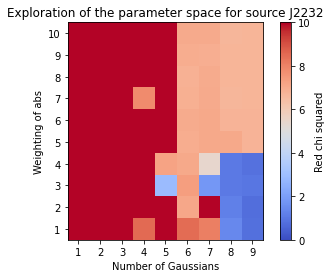

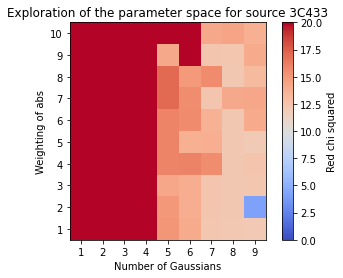

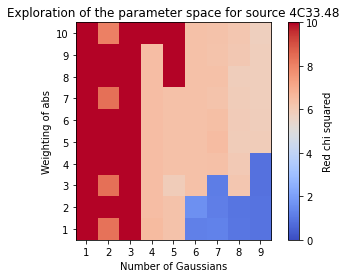

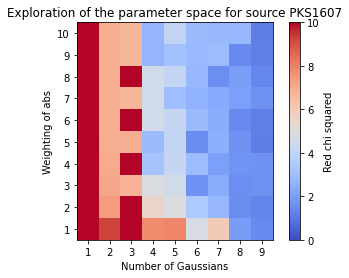

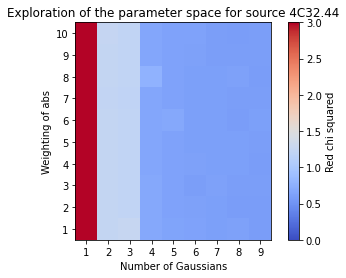

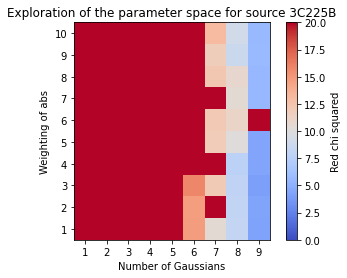

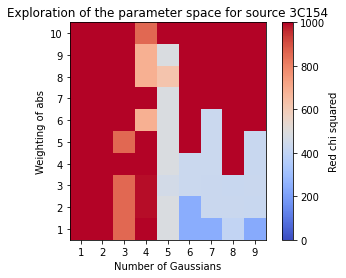

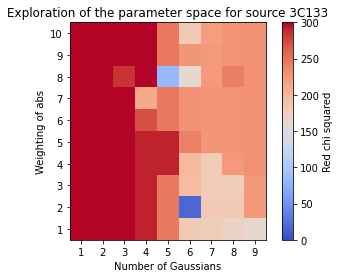

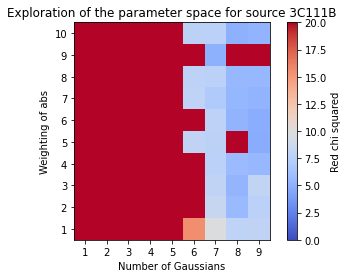

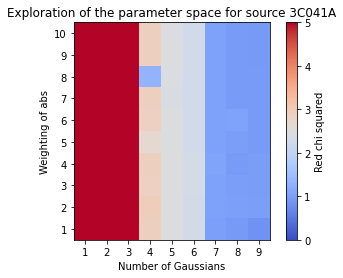

In [3]:
upper_limit=[10,20,10,10,3,20,1000,300,20,5]

for k in np.arange(10):
    idx_absline=np.where(data_s['NAMES']==test_sources[k])
    idx_absline=idx_absline[0][0]
    nan_values=np.isnan(data_s[idx_absline]["VEL"])
    numeric_values=[not i for i in nan_values]
    v = data_s[idx_absline]["VEL"][numeric_values]
    #correct velocities to model over
    chiller_vel_idx=np.intersect1d(np.where(v>-100.),np.where(v<80.))

    #initialise the reduced data
    v = v[chiller_vel_idx]
    Tb = data_s[idx_absline]["TB"][numeric_values][chiller_vel_idx]
    tau = data_s[idx_absline]["TAU"][numeric_values][chiller_vel_idx]
    rms_Tb=data_s[idx_absline]['SIG_TB'][numeric_values][chiller_vel_idx]
    rms_tau=data_s[idx_absline]['SIG_TAU'][numeric_values][chiller_vel_idx]

    #Channel spacing
    dv = np.diff(v)[0]

    #hdr
    hdr=fits.Header()
    hdr["CDELT3"] = dv
    hdr["CRPIX3"] = 0
    hdr["CRVAL3"] = v[0]*1.e3
    cube = np.moveaxis(np.array([Tb,tau]),0,1)
    core = lbfgs_abs(Tb=Tb, tau=tau, hdr=hdr)

    red_chi_sq_grid=np.zeros((10,9))

    for i in np.arange(1,11):
        for j in np.arange(1,10):
            params = np.reshape(np.loadtxt("exploration_output/even_{}_{}_l{}_gaussian_params.txt".format(test_sources[k],str(j),str(i))), (3*j, cube.shape[1]))
            model_cube = core.model(params, cube, j)
            res_Tb=np.abs(model_cube[:,0] - Tb)
            res_tau=np.abs(model_cube[:,1] - tau)
            norm_fact=2*len(v)-2*(3*j)
            red_chi_sq_grid[i-1,j-1]=(np.sum((res_Tb/rms_Tb)**2)+np.sum((res_tau/rms_tau)**2))/norm_fact
        
    imgplot = plt.imshow(red_chi_sq_grid,origin='lower',interpolation='nearest')
    imgplot.set_cmap('coolwarm')
    plt.colorbar(label="Red chi squared")
    #if np.max(red_chi_sq_grid)>50:
        #plt.clim(0, 50)
    plt.clim(0, upper_limit[k])
    plt.xlabel('Number of Gaussians')
    plt.ylabel('Weighting of abs')
    plt.xticks(np.arange(9),['1','2','3','4','5','6','7','8','9'])
    plt.yticks(np.arange(10),['1','2','3','4','5','6','7','8','9','10'])
    plt.title('Exploration of the parameter space for source {}'.format(test_sources[k]))
    plt.show()

We're now going to replot all the v vs v and sig vs sig plots for a source, forcing the axes to have a one on one correlation, as this was not forced in the output. This will help us see the progression of the move towards or away from the trend we want. 

This is gaussian 1 and lambda tau 10


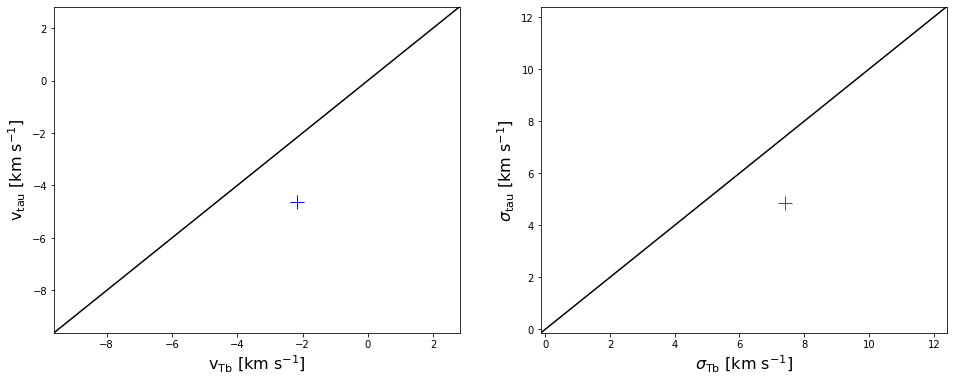

This is gaussian 2 and lambda tau 10


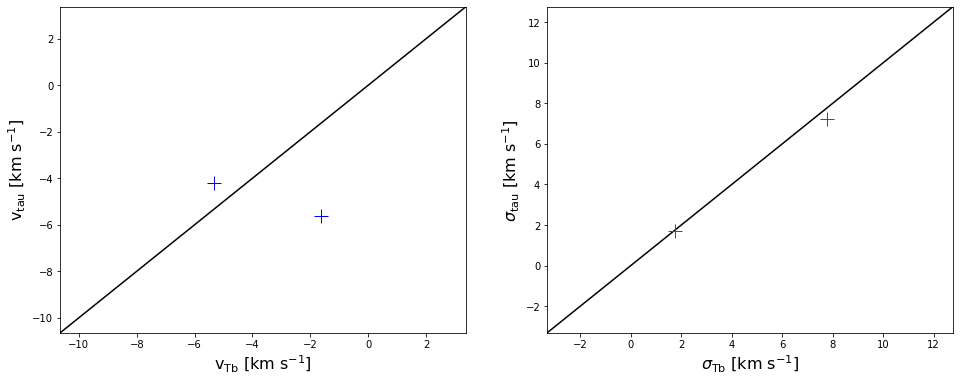

This is gaussian 3 and lambda tau 10


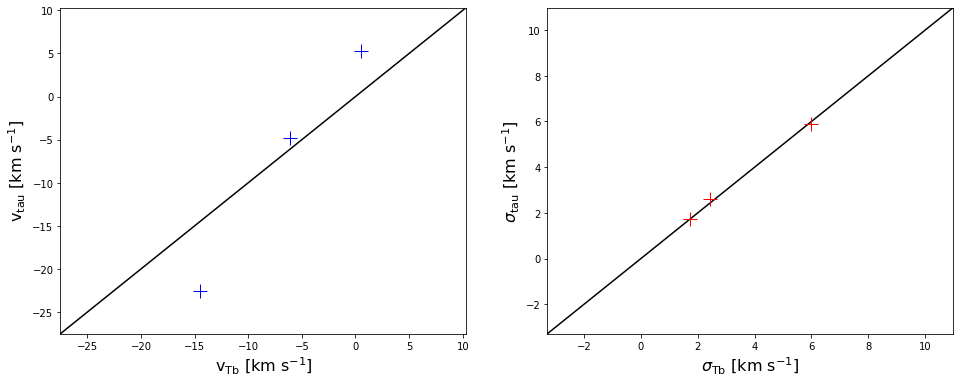

This is gaussian 4 and lambda tau 10


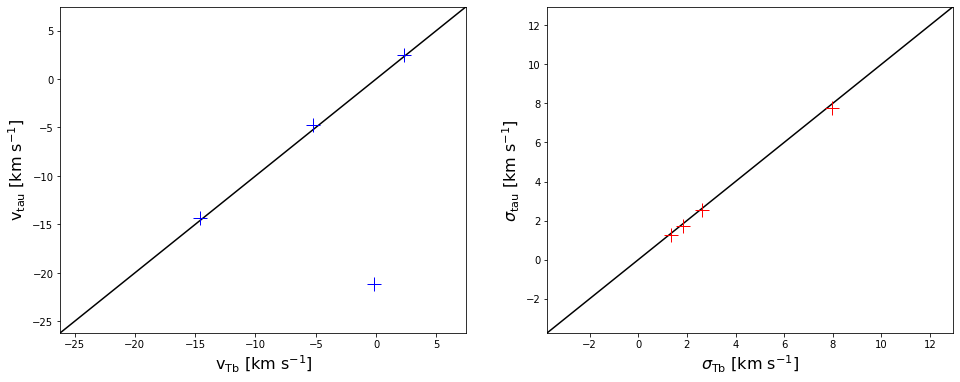

This is gaussian 5 and lambda tau 10


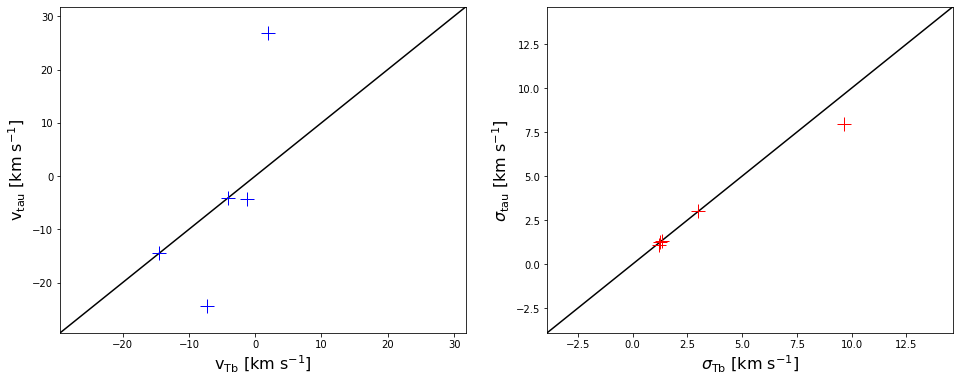

This is gaussian 6 and lambda tau 10


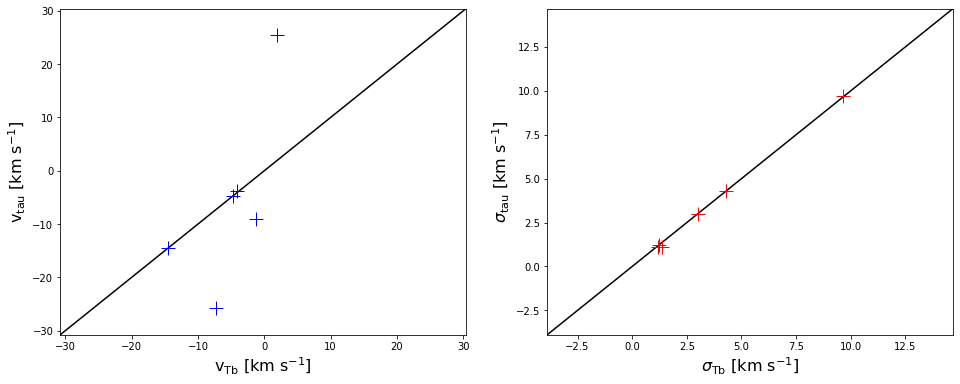

This is gaussian 7 and lambda tau 10


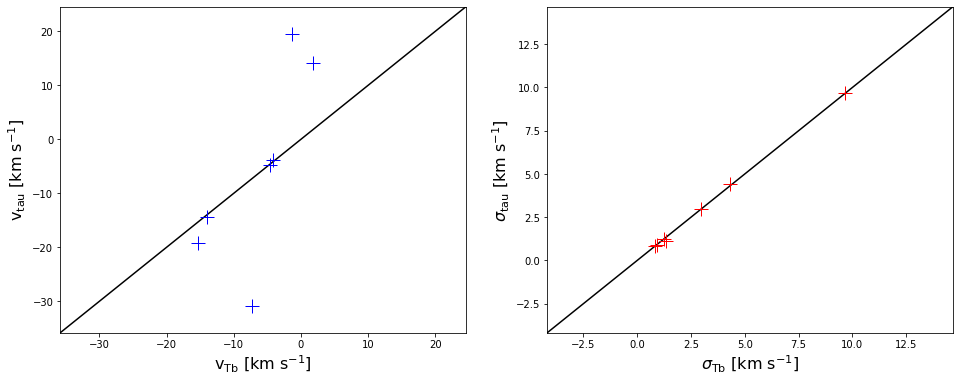

This is gaussian 8 and lambda tau 10


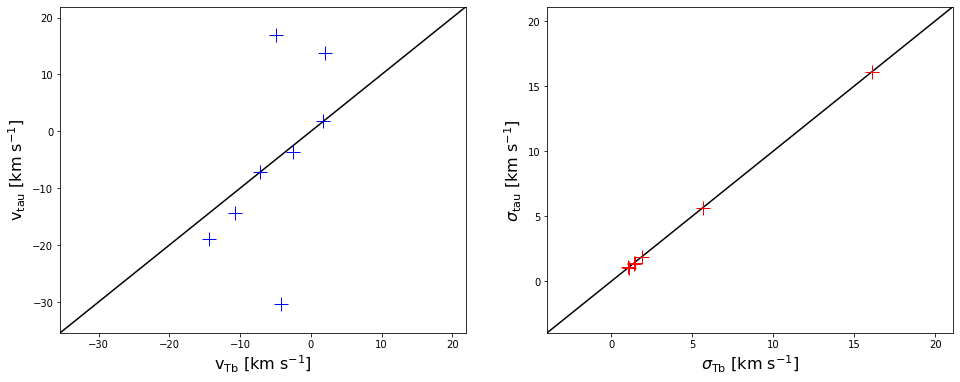

This is gaussian 9 and lambda tau 10


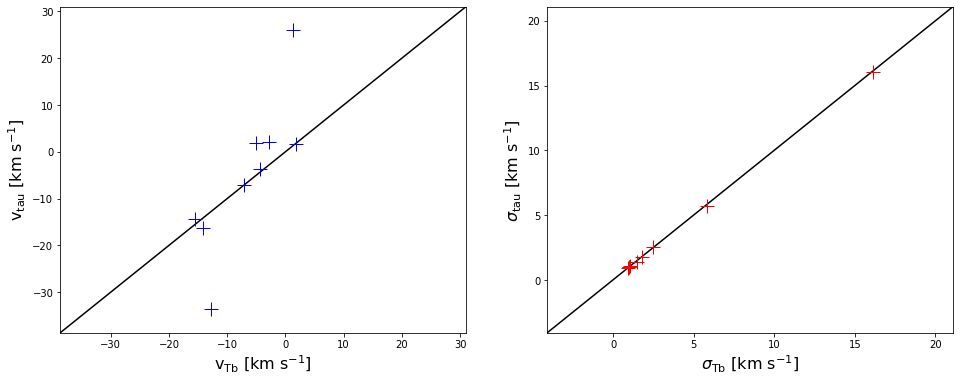

This is gaussian 1 and lambda tau 20


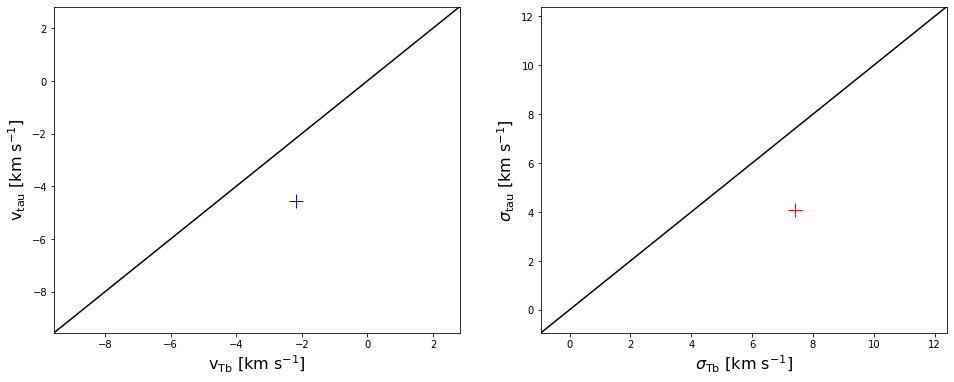

This is gaussian 2 and lambda tau 20


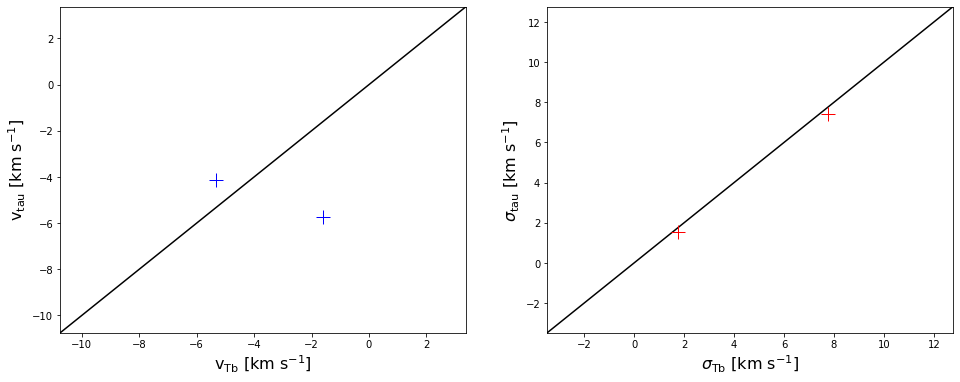

This is gaussian 3 and lambda tau 20


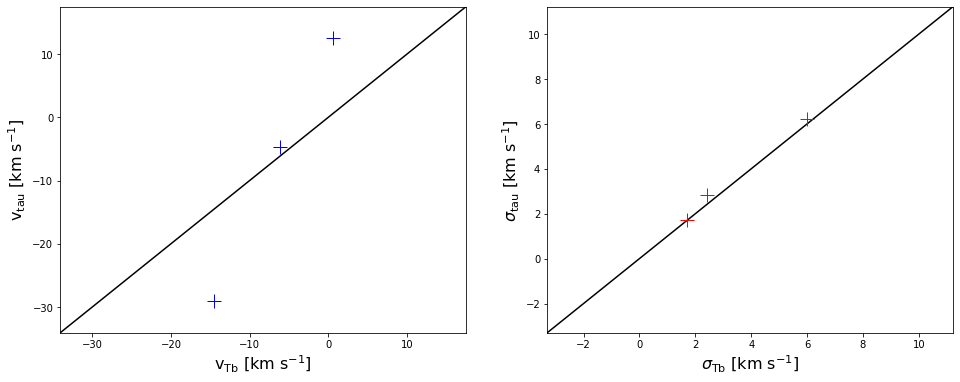

This is gaussian 4 and lambda tau 20


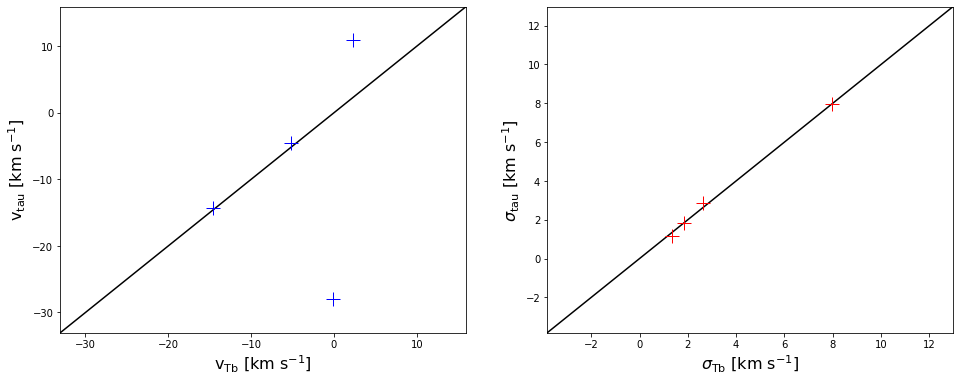

This is gaussian 5 and lambda tau 20


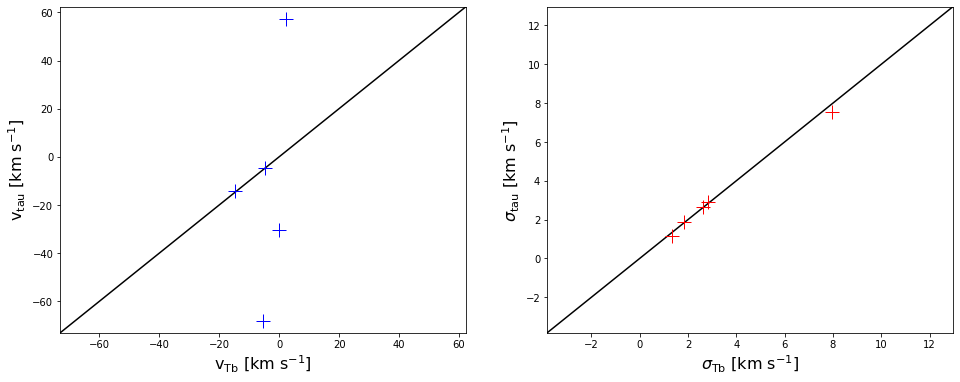

This is gaussian 6 and lambda tau 20


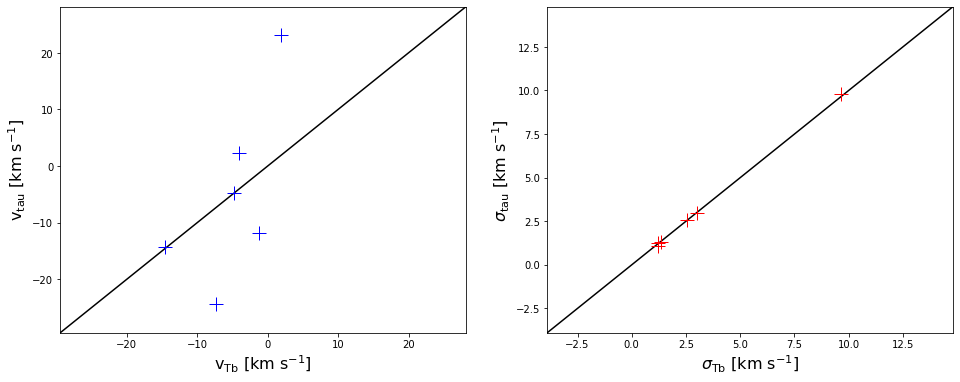

This is gaussian 7 and lambda tau 20


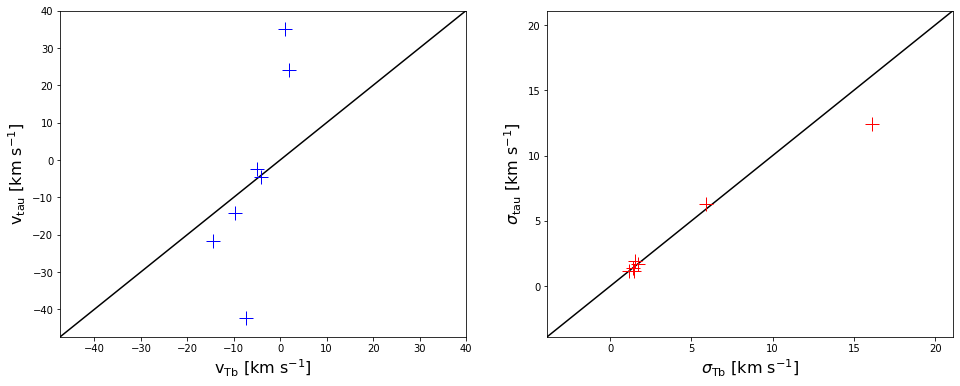

This is gaussian 8 and lambda tau 20


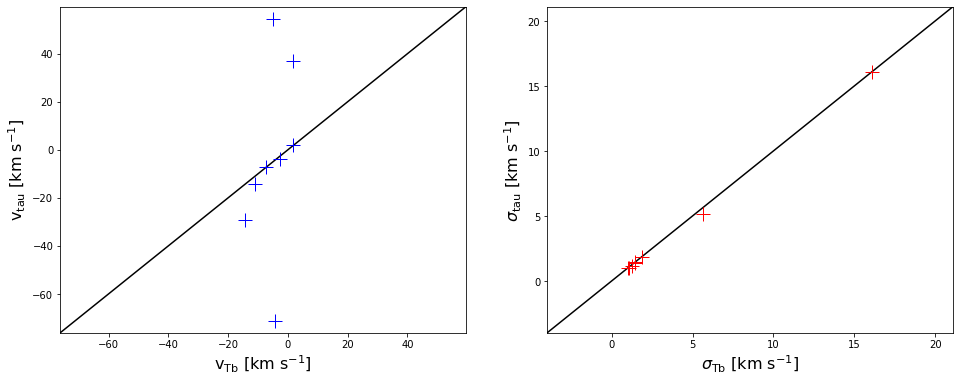

This is gaussian 9 and lambda tau 20


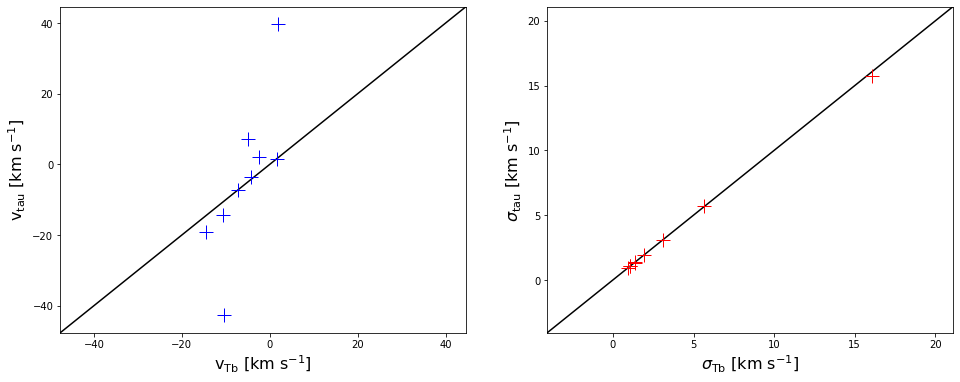

This is gaussian 1 and lambda tau 30


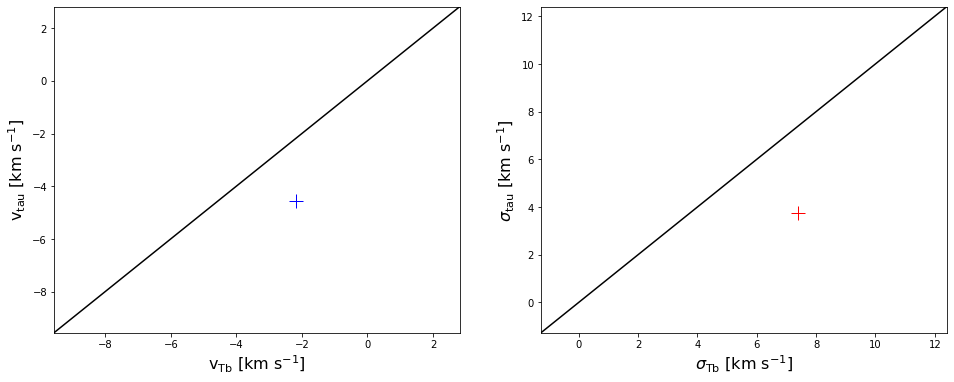

This is gaussian 2 and lambda tau 30


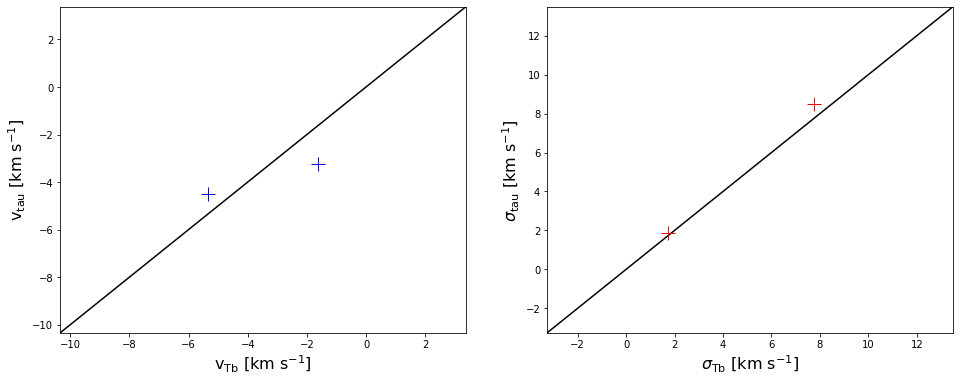

This is gaussian 3 and lambda tau 30


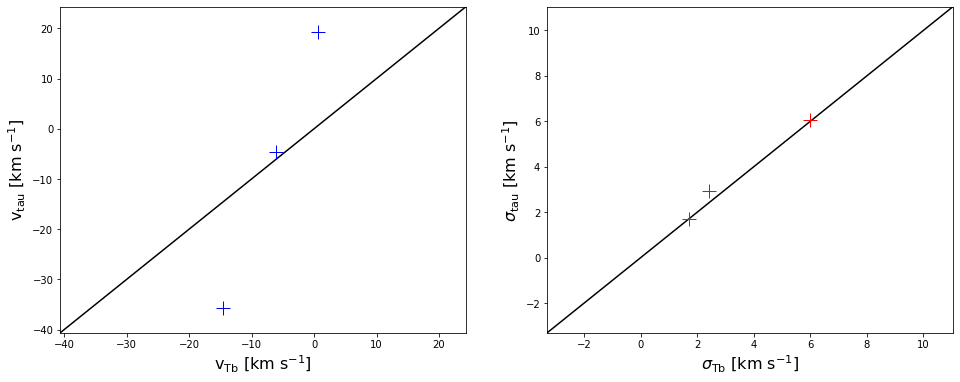

This is gaussian 4 and lambda tau 30


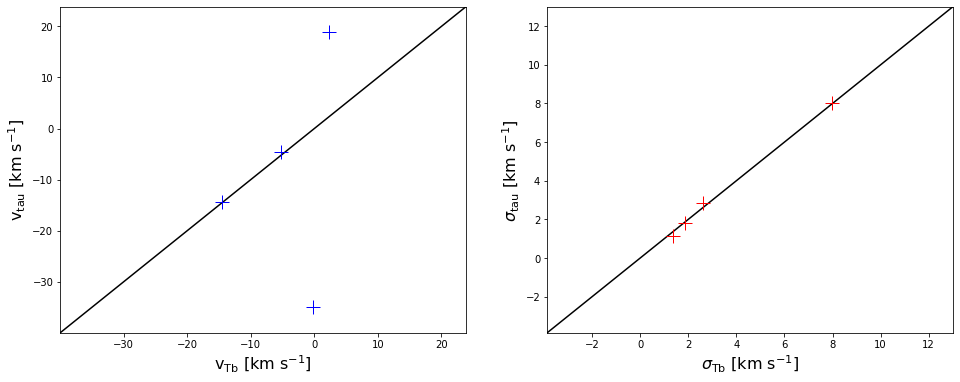

This is gaussian 5 and lambda tau 30


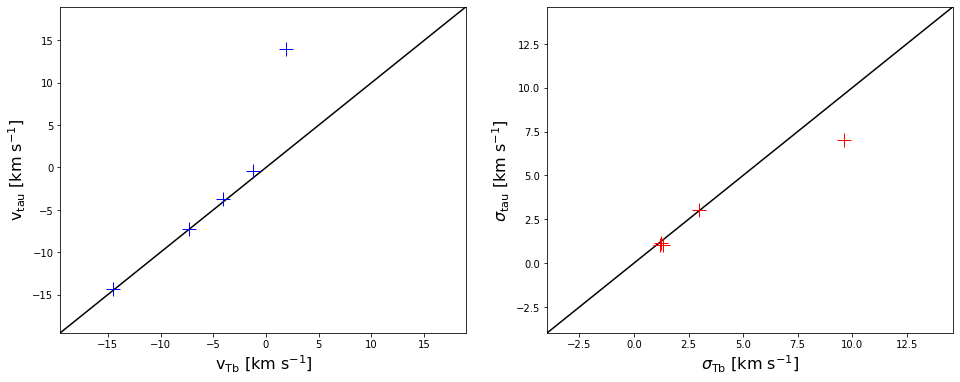

This is gaussian 6 and lambda tau 30


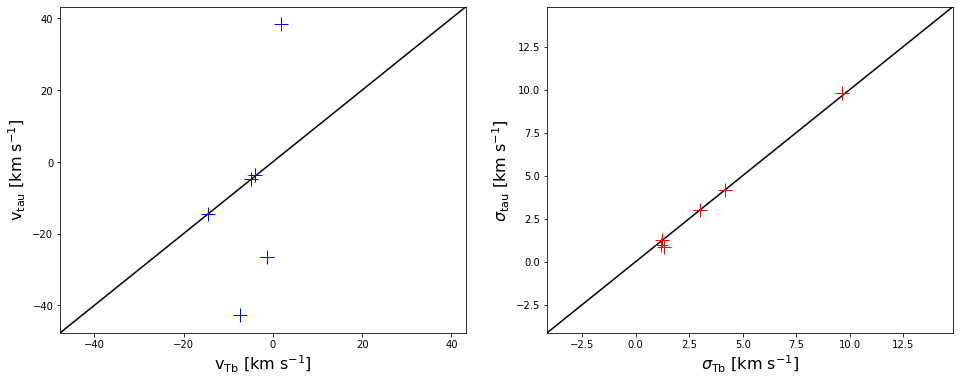

This is gaussian 7 and lambda tau 30


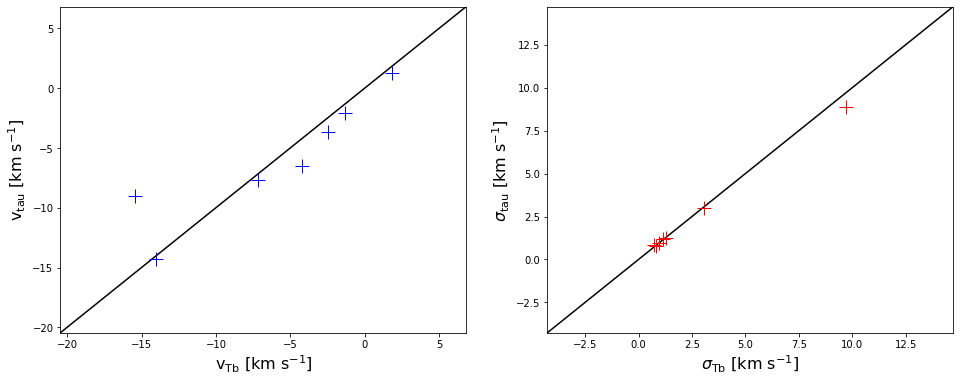

This is gaussian 8 and lambda tau 30


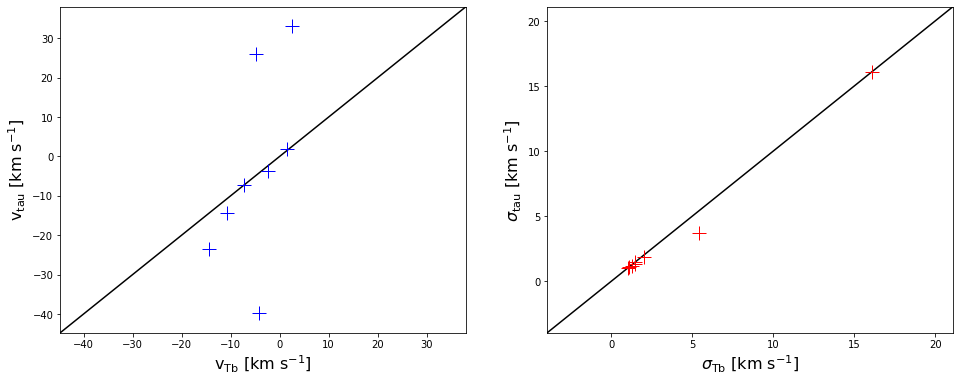

This is gaussian 9 and lambda tau 30


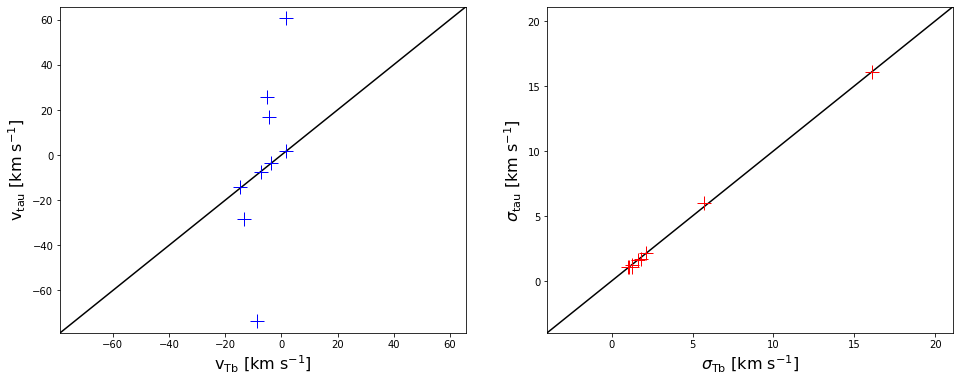

This is gaussian 1 and lambda tau 40


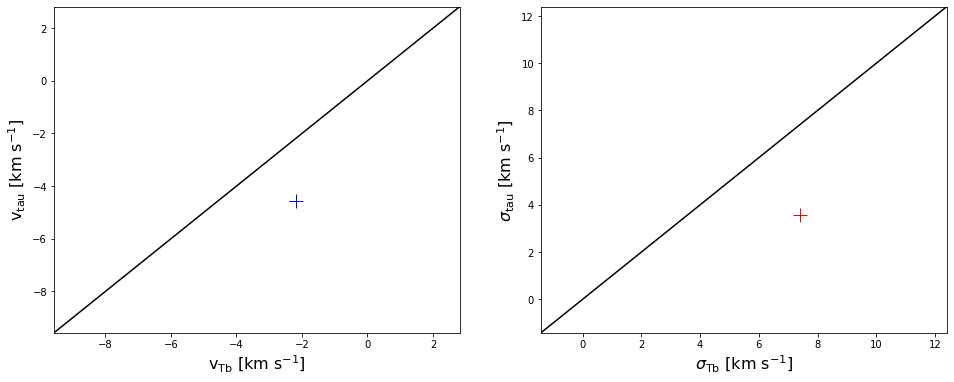

This is gaussian 2 and lambda tau 40


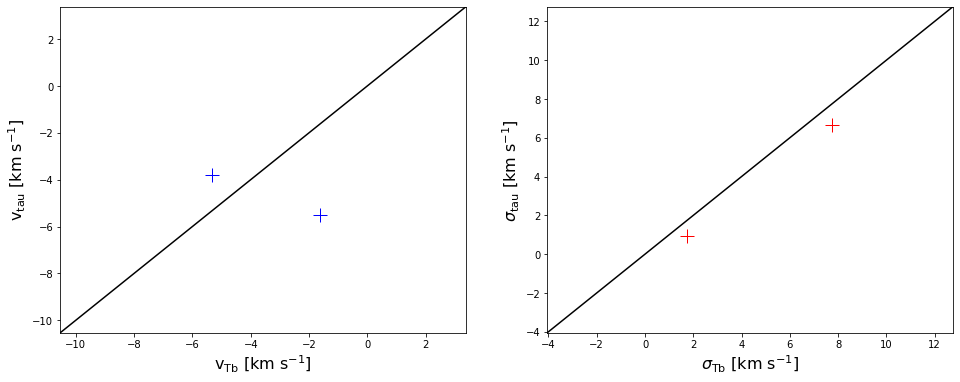

This is gaussian 3 and lambda tau 40


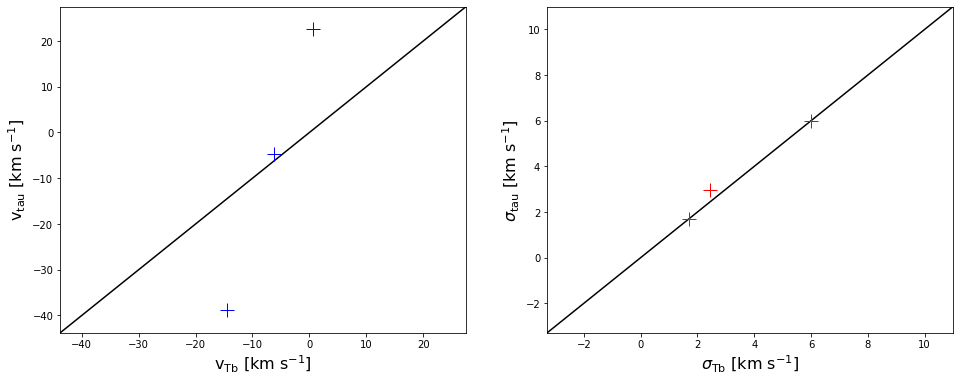

This is gaussian 4 and lambda tau 40


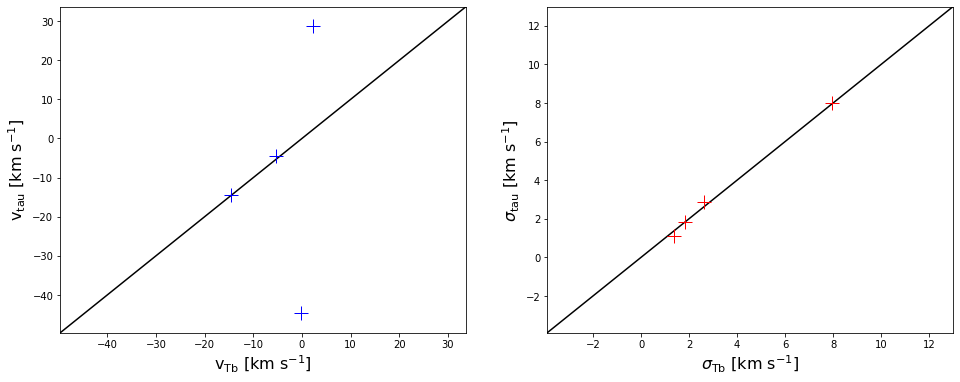

This is gaussian 5 and lambda tau 40


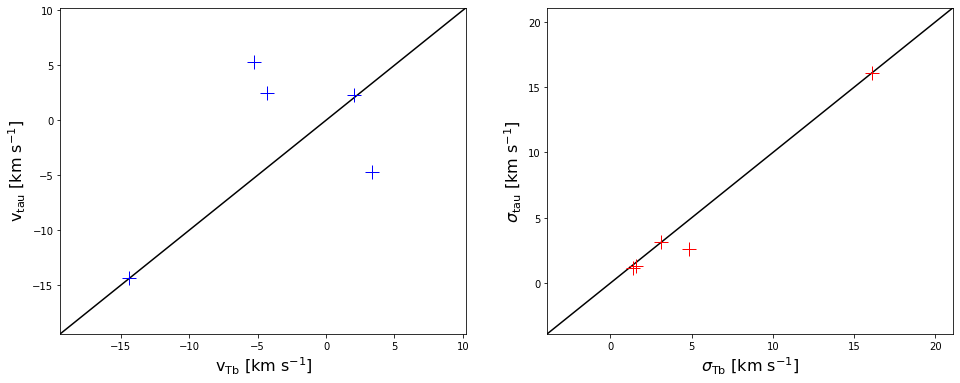

This is gaussian 6 and lambda tau 40


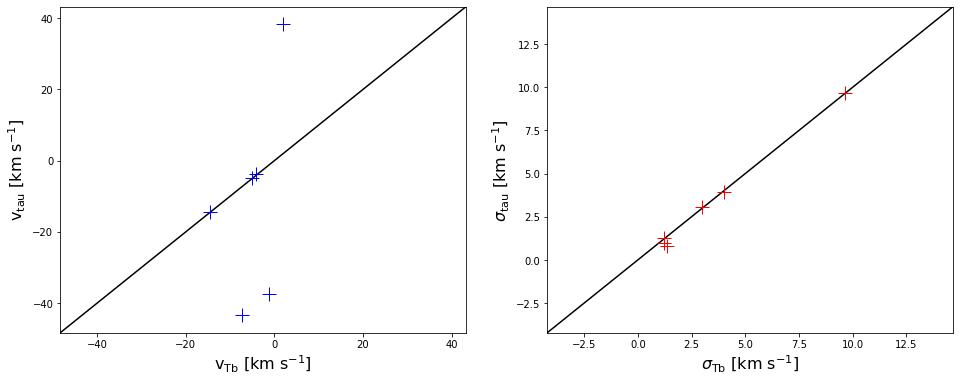

This is gaussian 7 and lambda tau 40


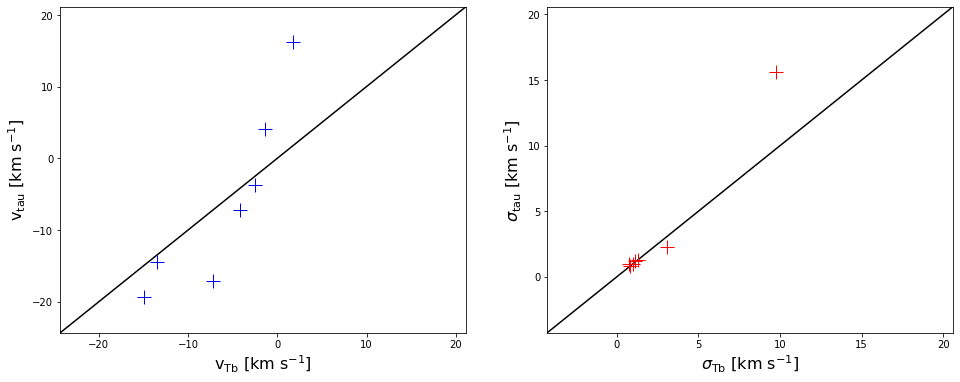

This is gaussian 8 and lambda tau 40


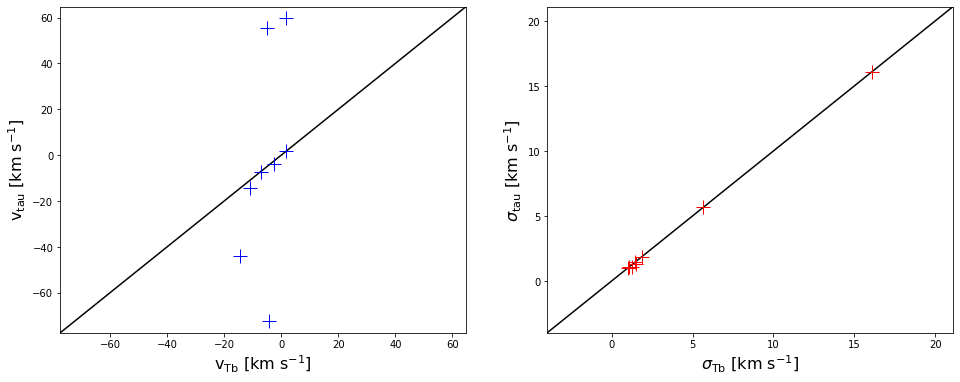

This is gaussian 9 and lambda tau 40


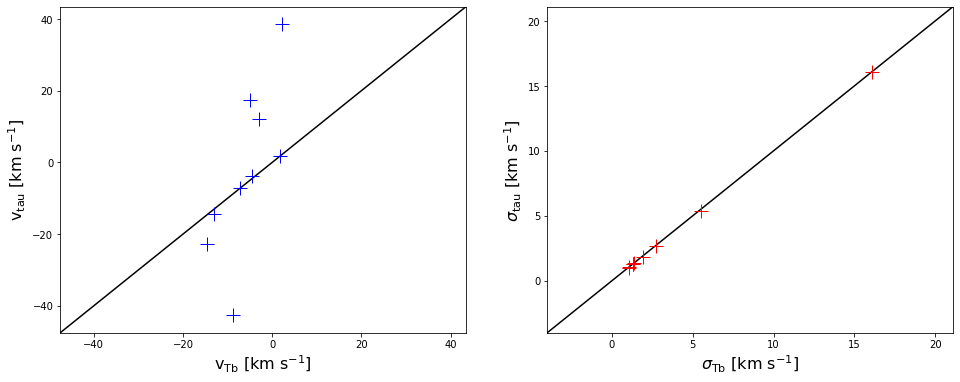

This is gaussian 1 and lambda tau 50


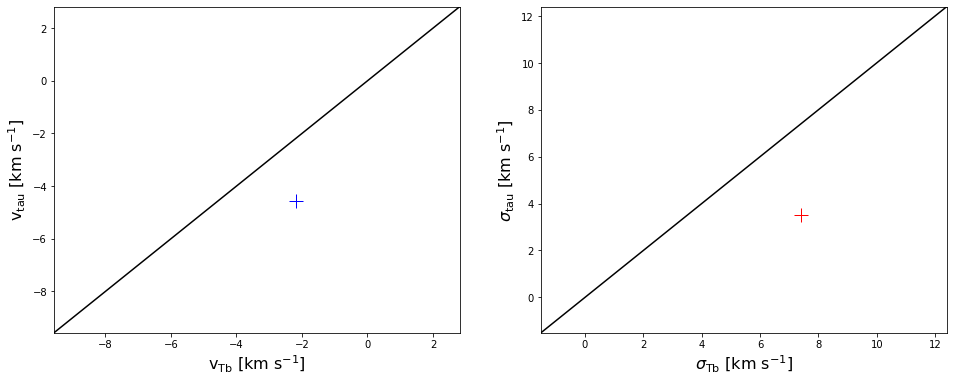

This is gaussian 2 and lambda tau 50


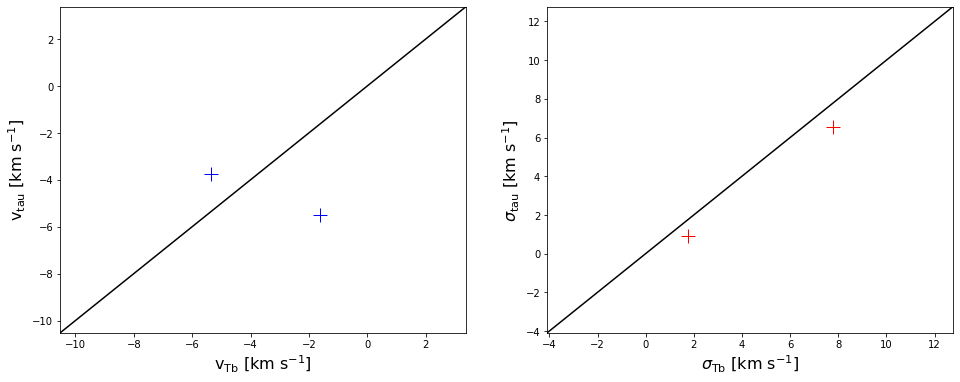

This is gaussian 3 and lambda tau 50


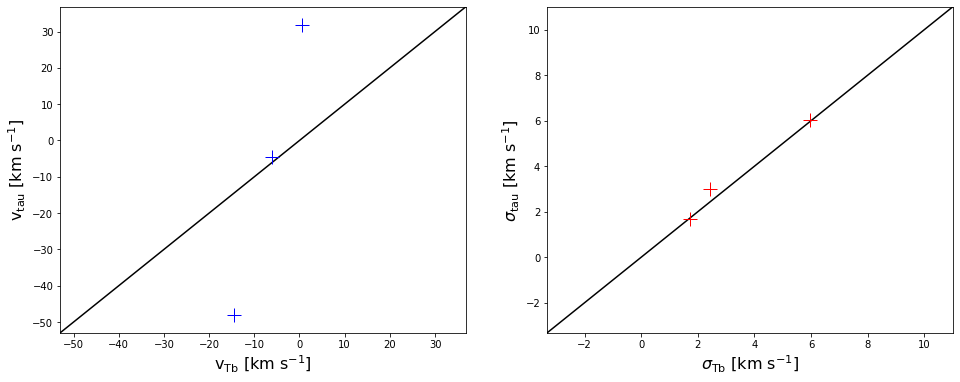

This is gaussian 4 and lambda tau 50


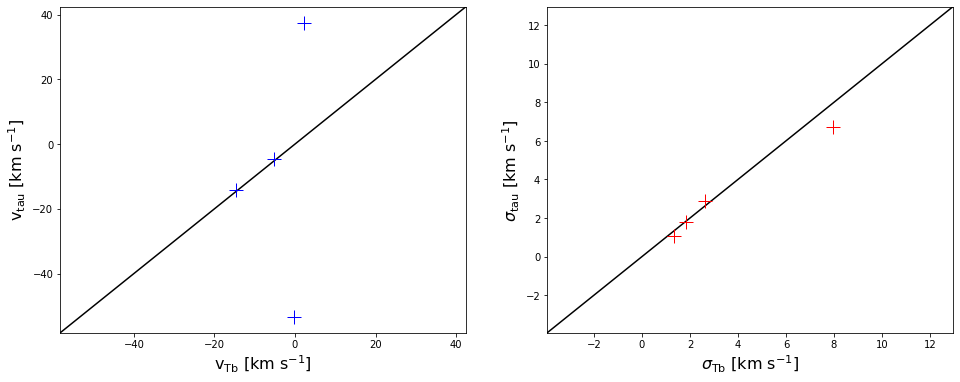

This is gaussian 5 and lambda tau 50


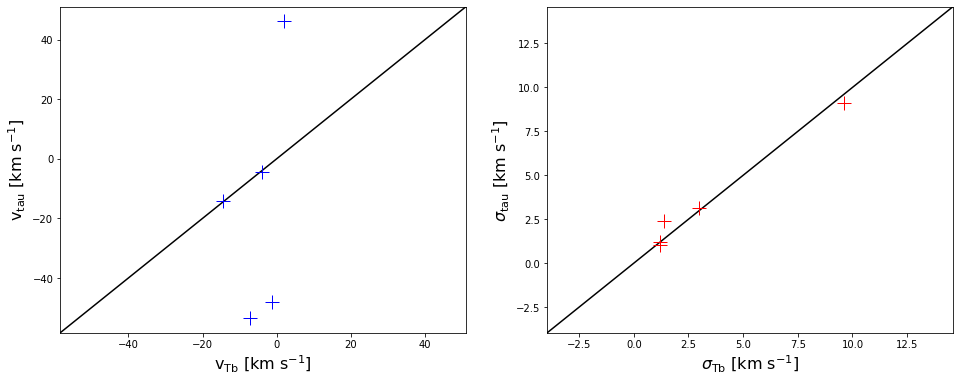

This is gaussian 6 and lambda tau 50


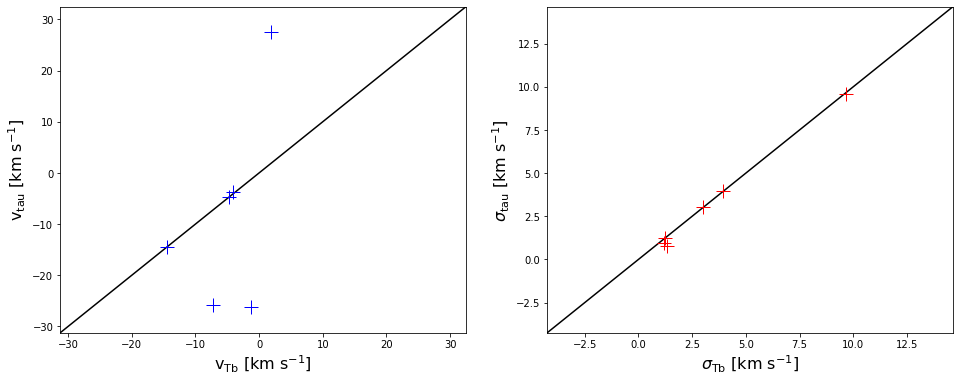

This is gaussian 7 and lambda tau 50


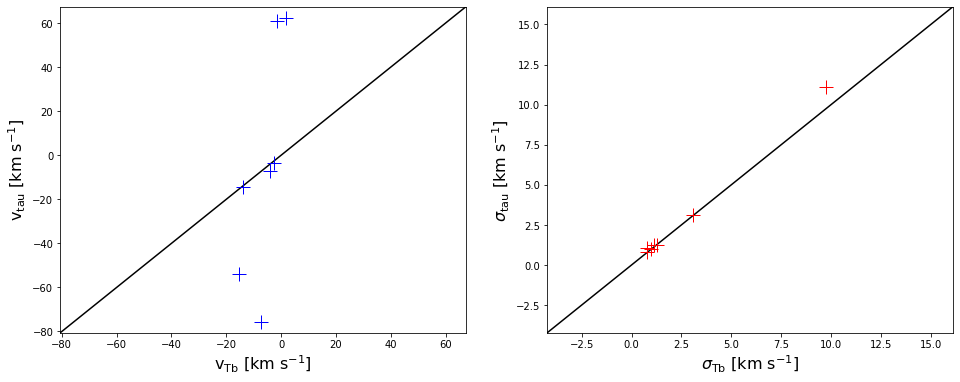

This is gaussian 8 and lambda tau 50


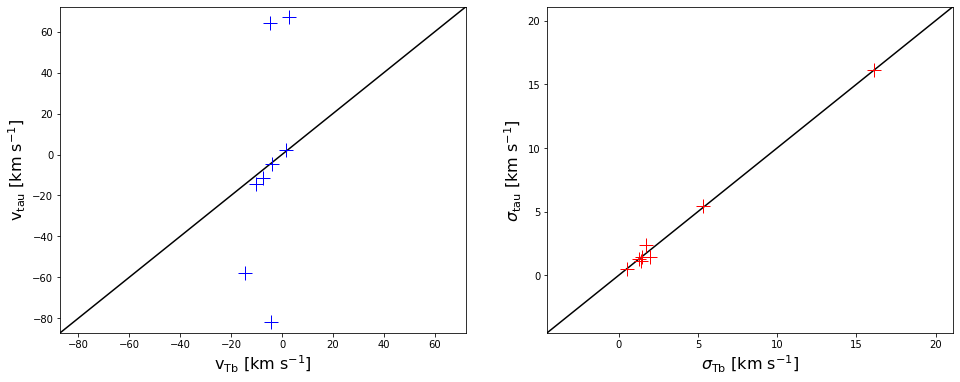

This is gaussian 9 and lambda tau 50


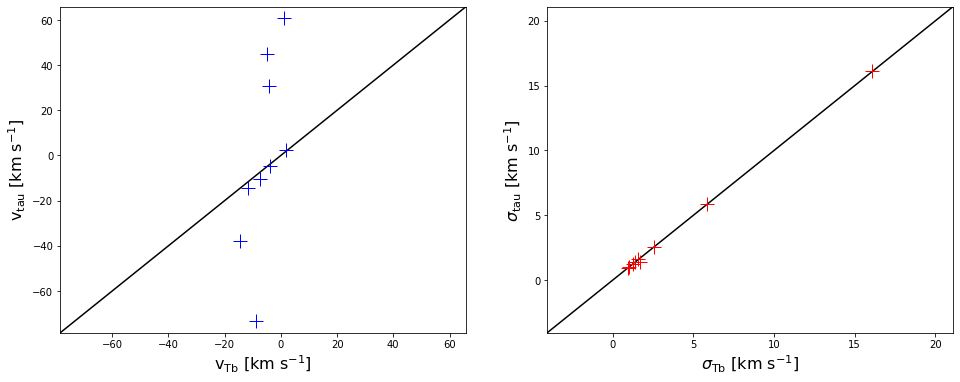

This is gaussian 1 and lambda tau 60


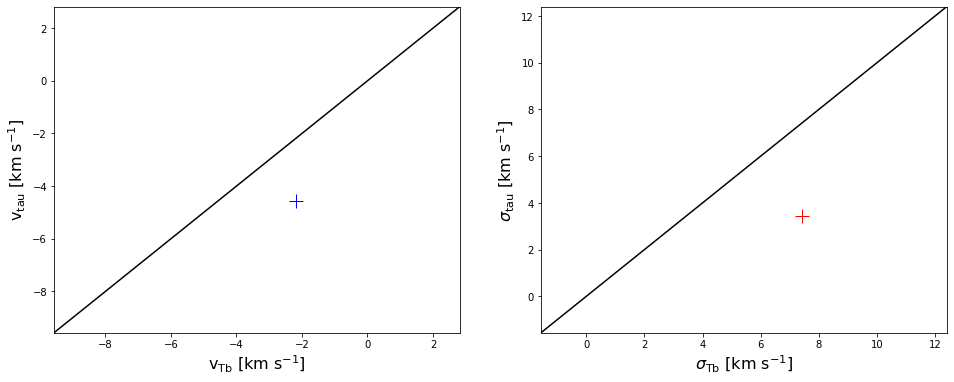

This is gaussian 2 and lambda tau 60


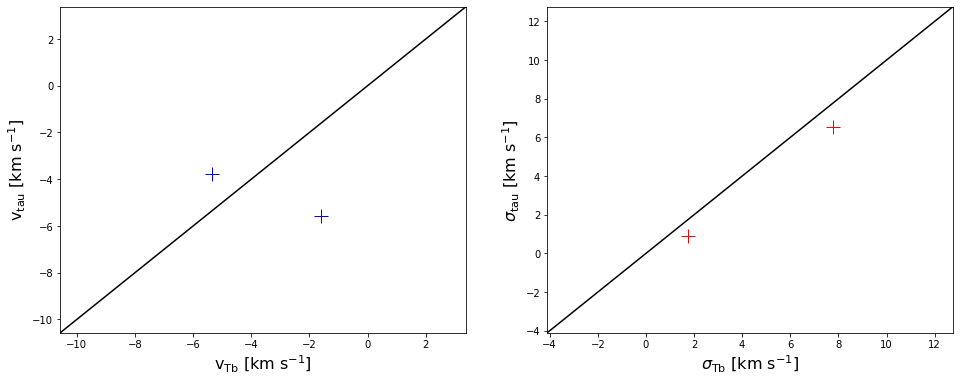

This is gaussian 3 and lambda tau 60


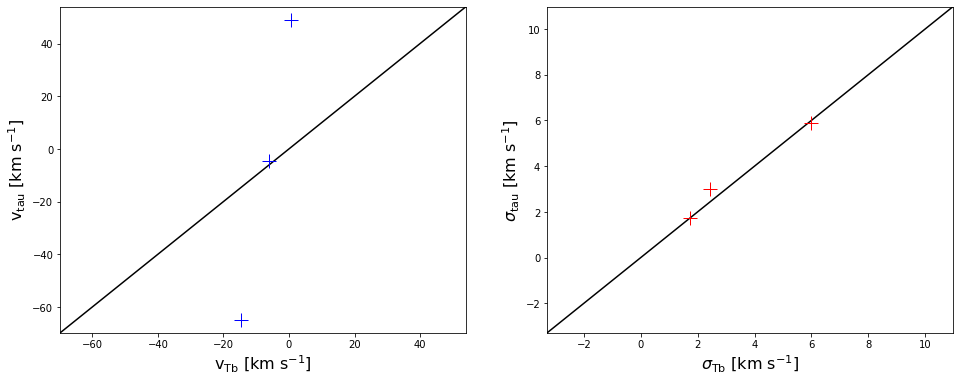

This is gaussian 4 and lambda tau 60


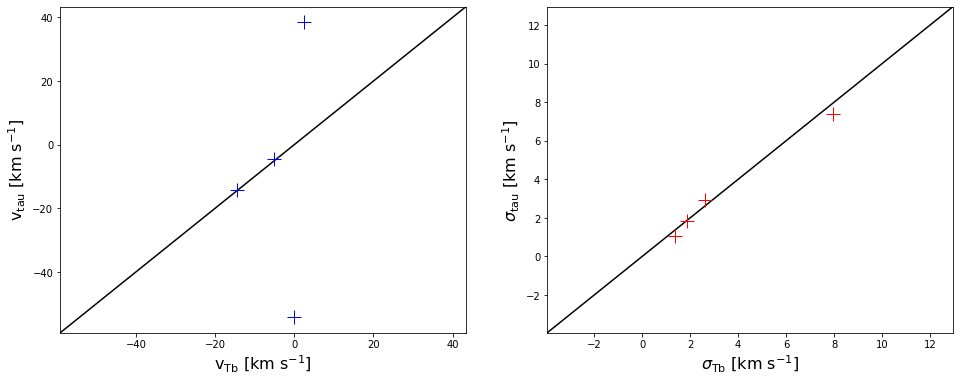

This is gaussian 5 and lambda tau 60


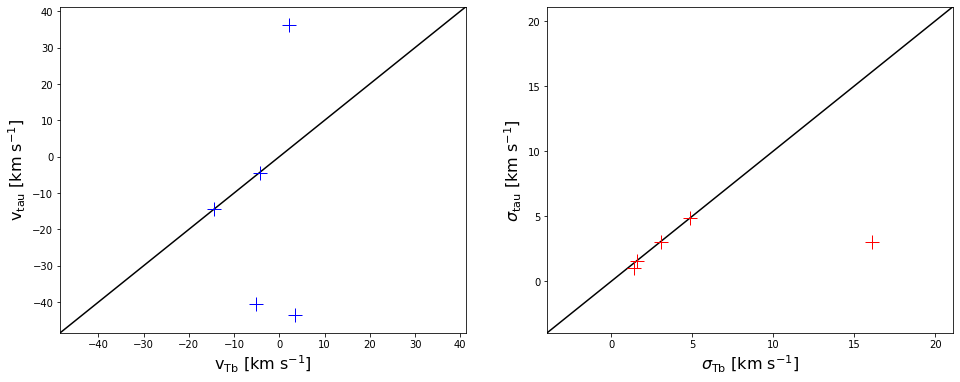

This is gaussian 6 and lambda tau 60


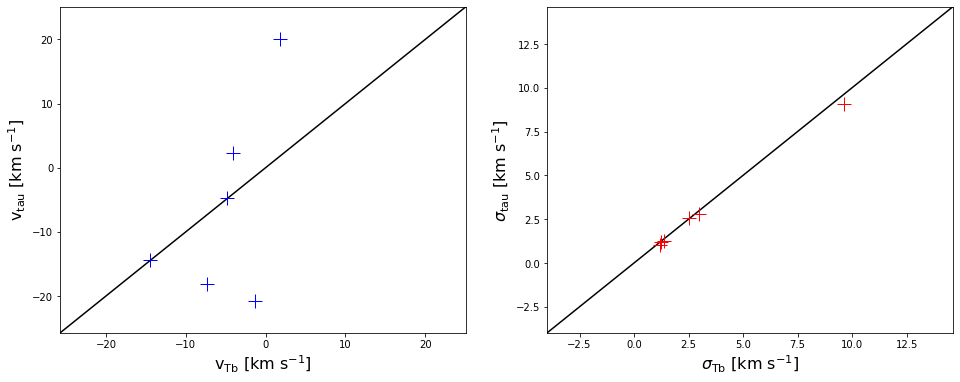

This is gaussian 7 and lambda tau 60


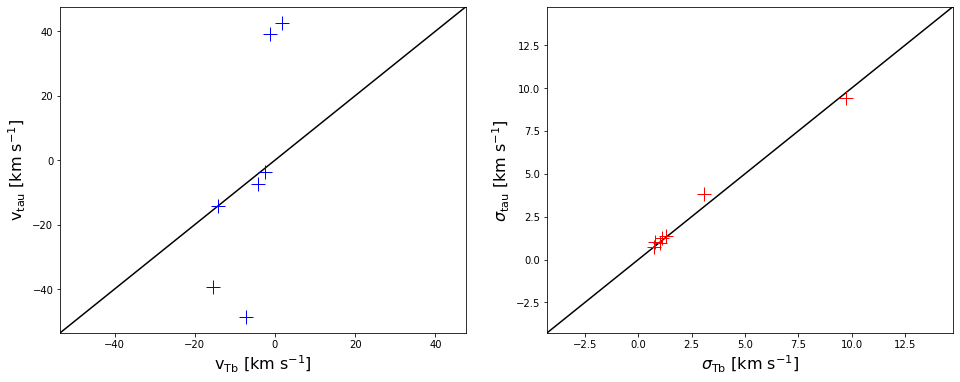

This is gaussian 8 and lambda tau 60


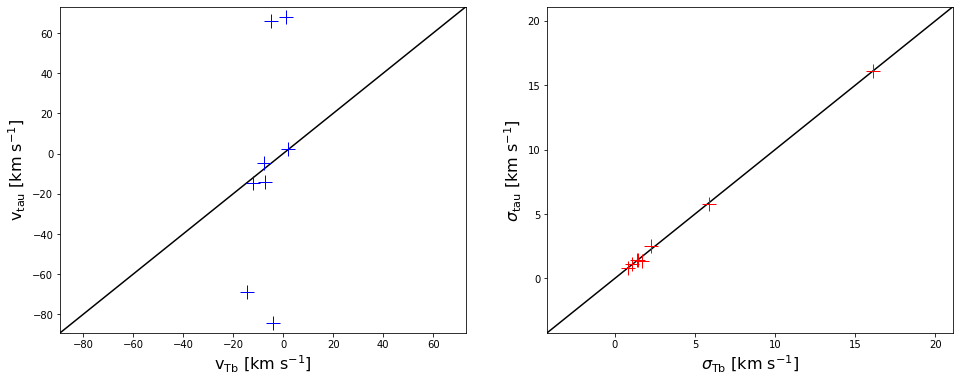

This is gaussian 9 and lambda tau 60


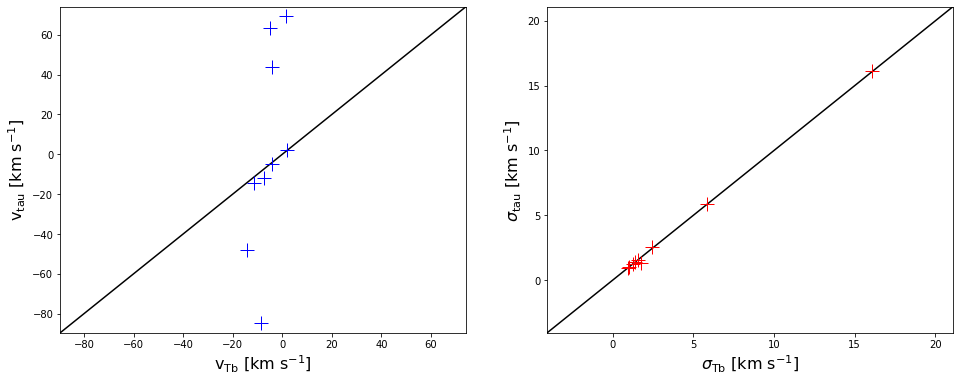

This is gaussian 1 and lambda tau 70


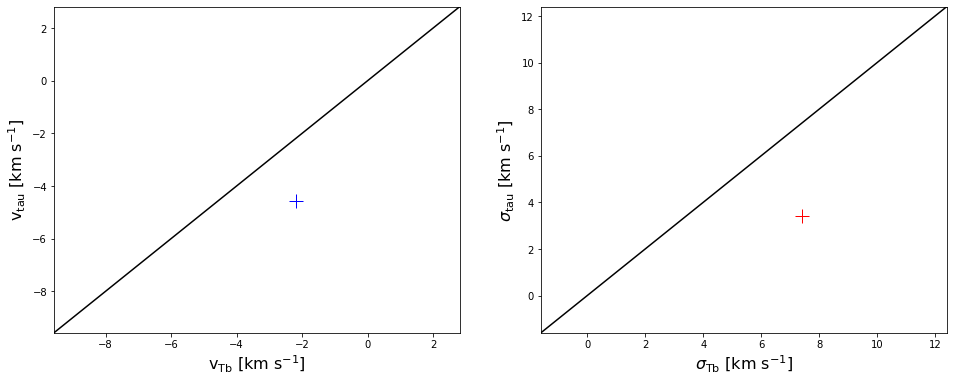

This is gaussian 2 and lambda tau 70


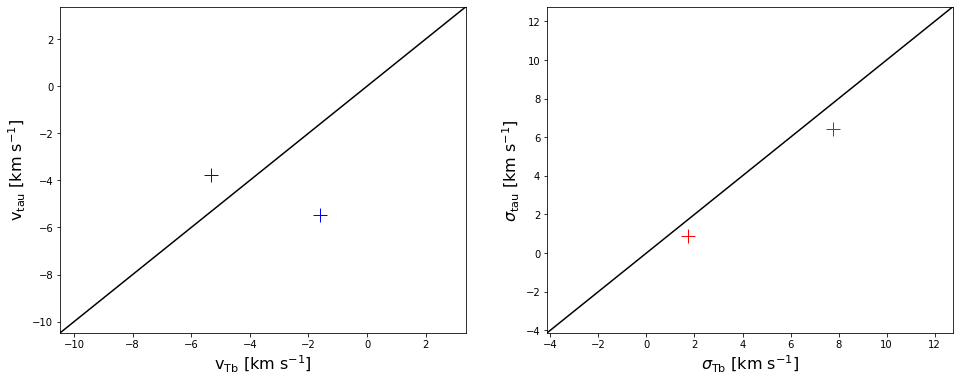

This is gaussian 3 and lambda tau 70


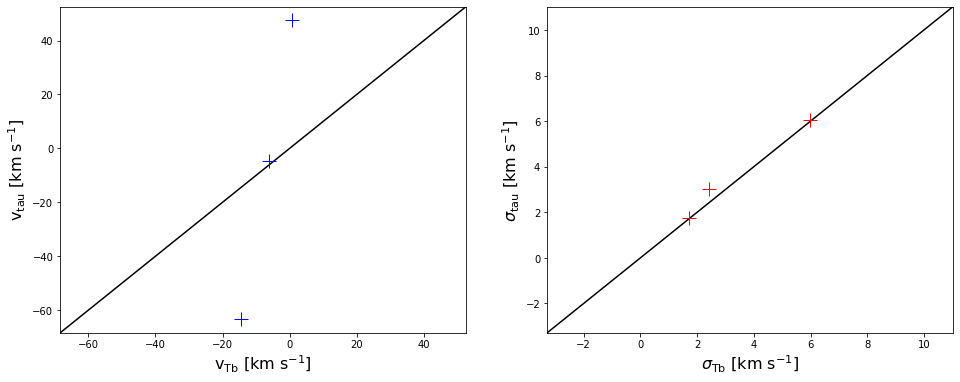

This is gaussian 4 and lambda tau 70


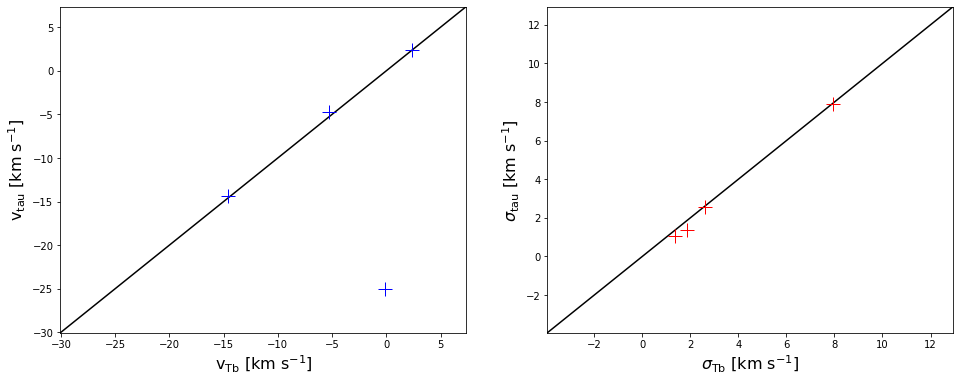

This is gaussian 5 and lambda tau 70


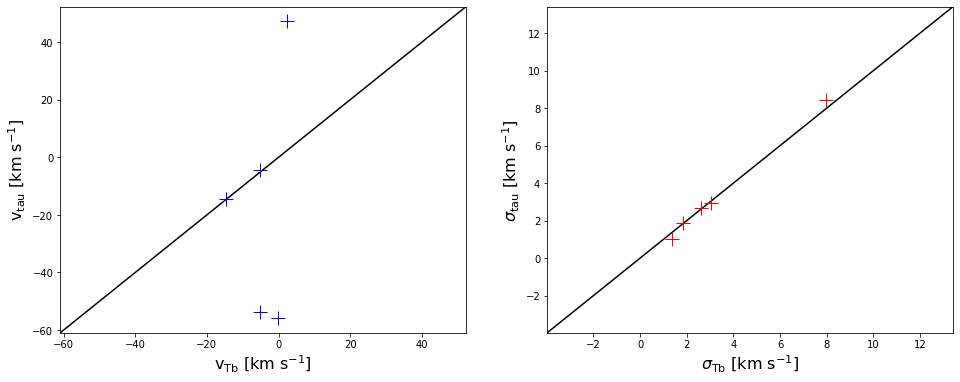

This is gaussian 6 and lambda tau 70


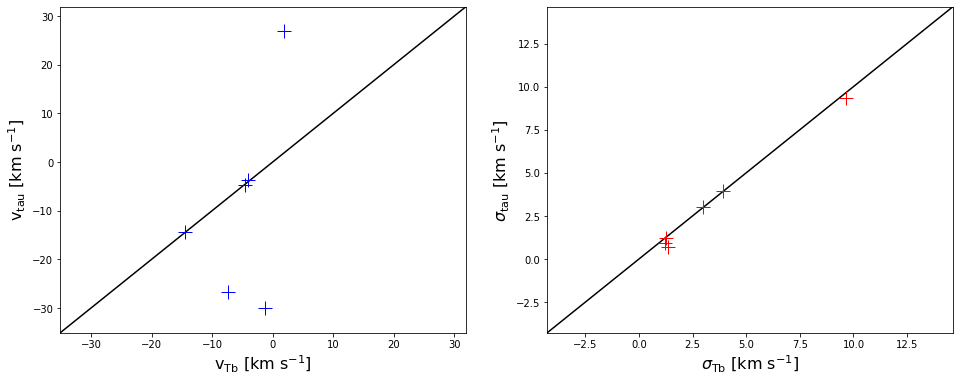

This is gaussian 7 and lambda tau 70


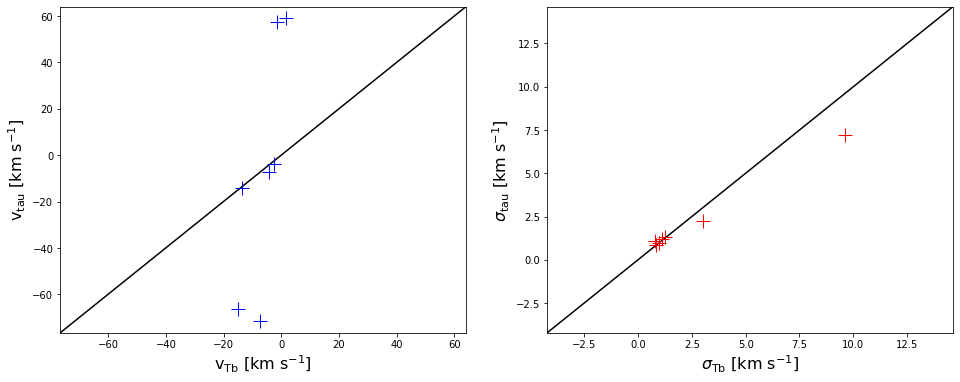

This is gaussian 8 and lambda tau 70


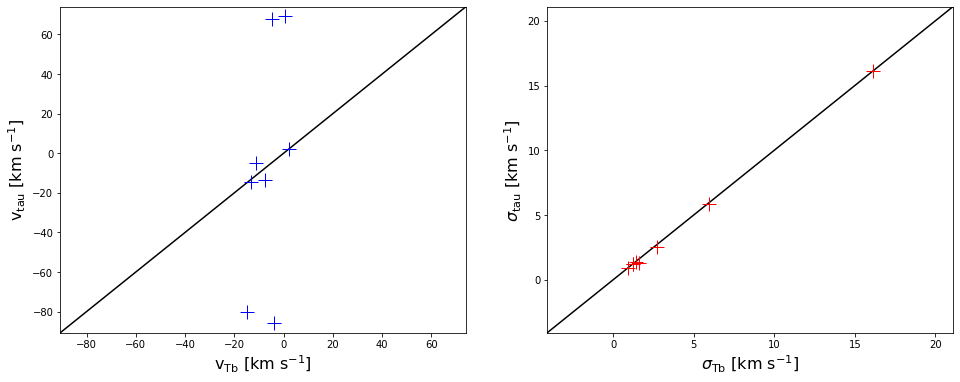

This is gaussian 9 and lambda tau 70


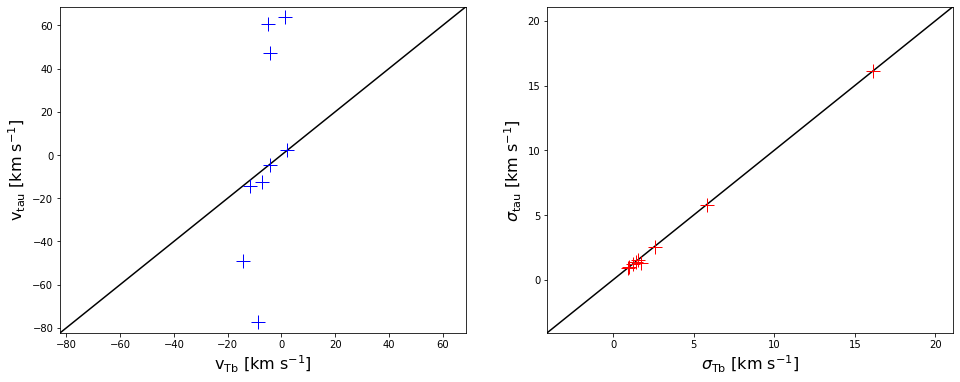

This is gaussian 1 and lambda tau 80


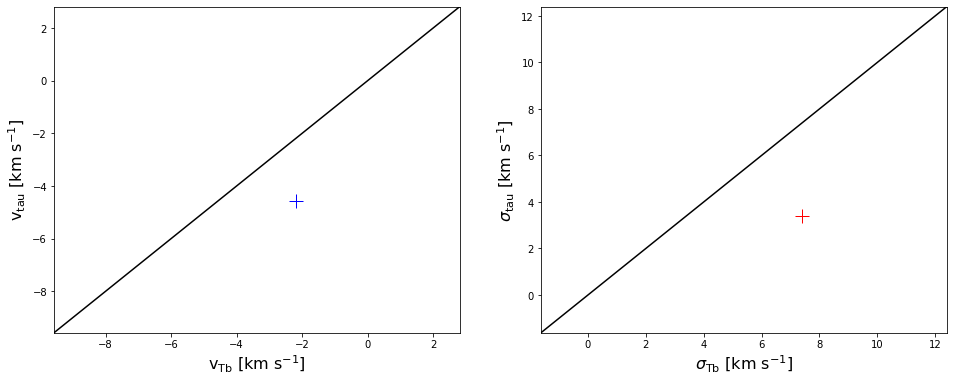

This is gaussian 2 and lambda tau 80


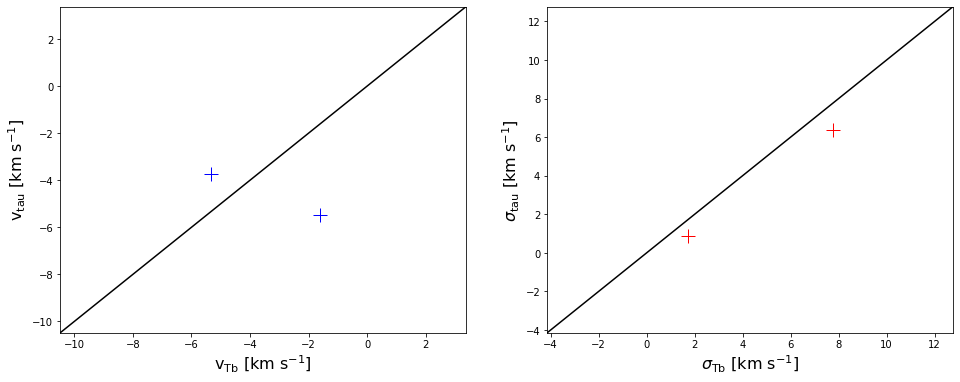

This is gaussian 3 and lambda tau 80


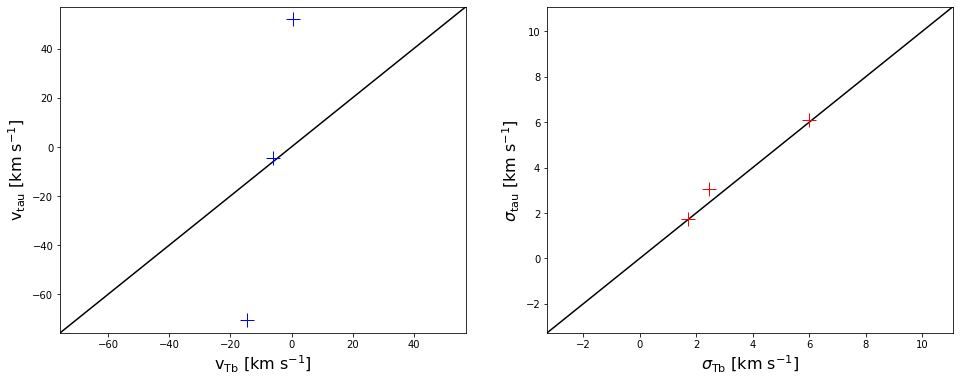

This is gaussian 4 and lambda tau 80


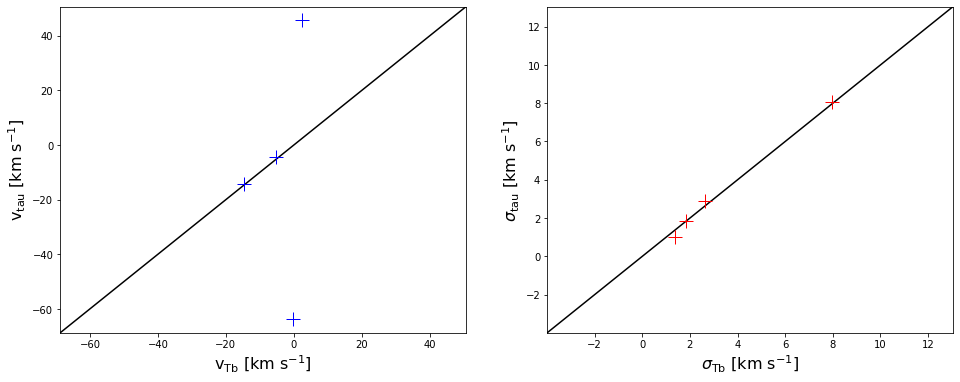

This is gaussian 5 and lambda tau 80


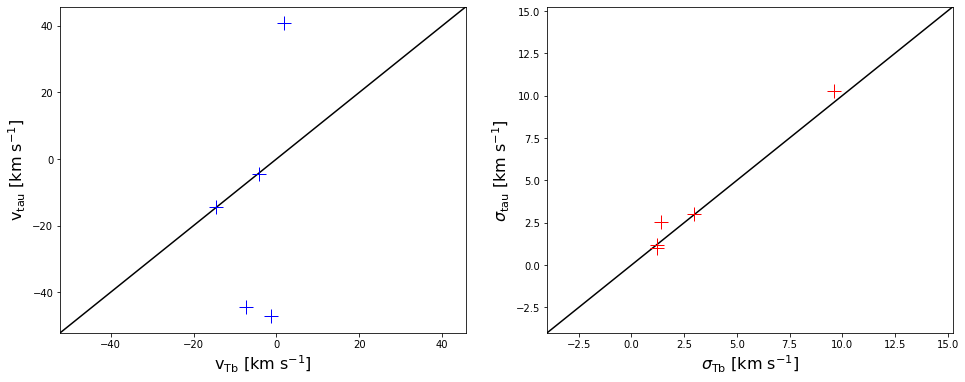

This is gaussian 6 and lambda tau 80


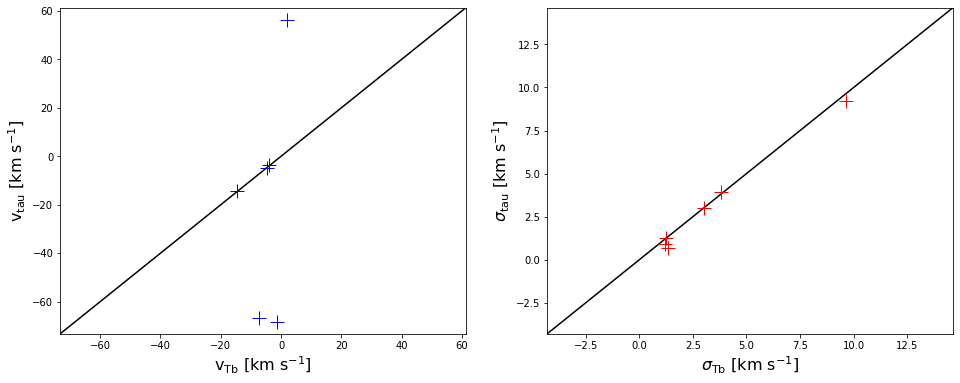

This is gaussian 7 and lambda tau 80


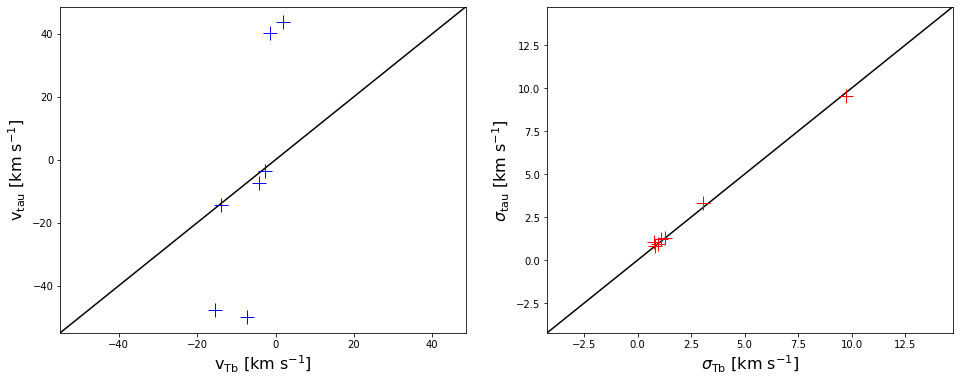

This is gaussian 8 and lambda tau 80


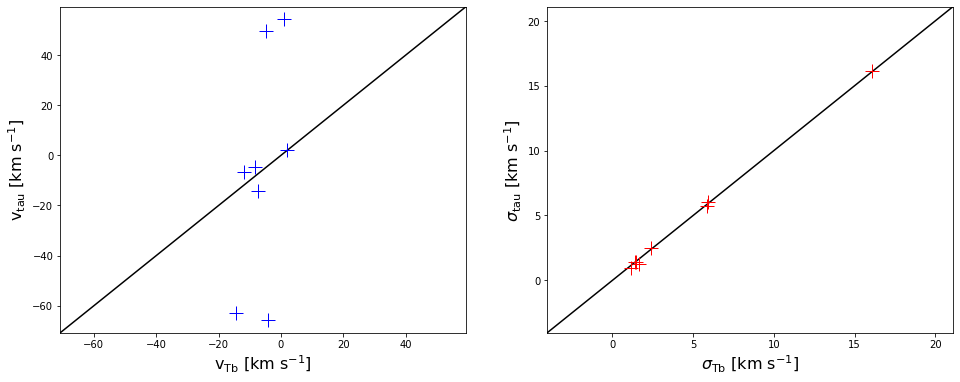

This is gaussian 9 and lambda tau 80


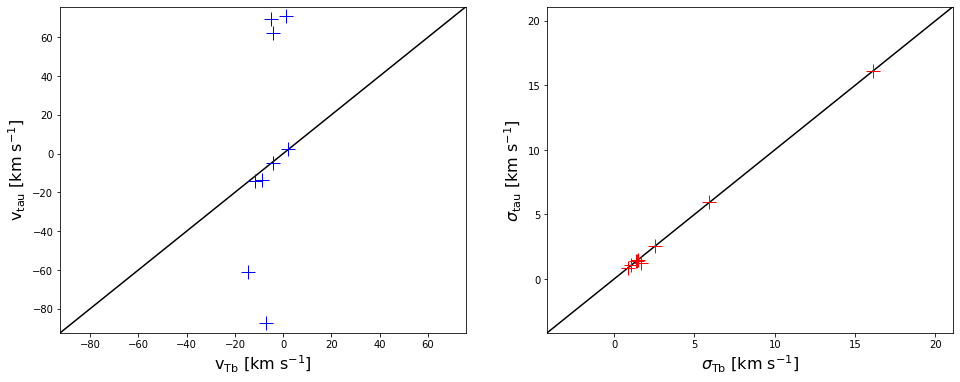

This is gaussian 1 and lambda tau 90


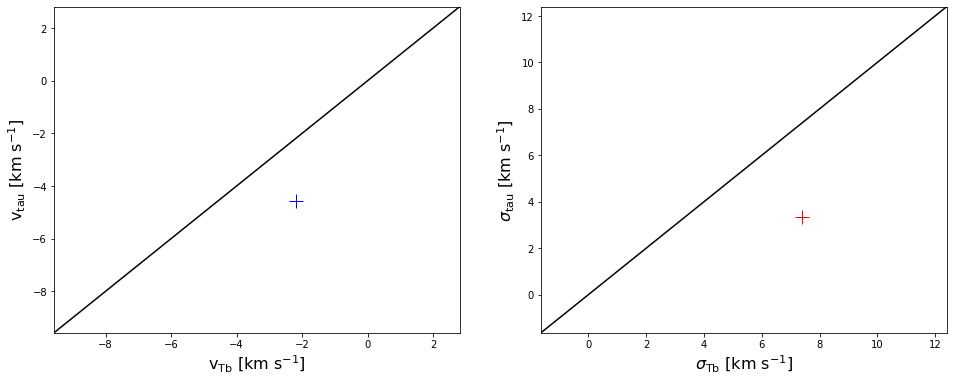

This is gaussian 2 and lambda tau 90


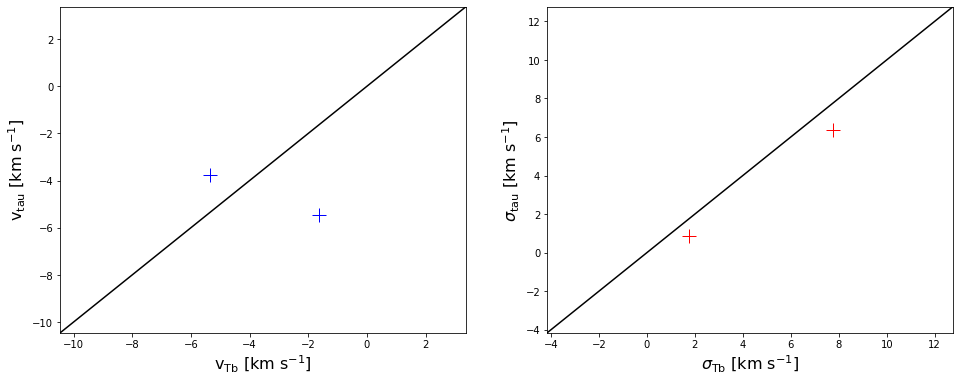

This is gaussian 3 and lambda tau 90


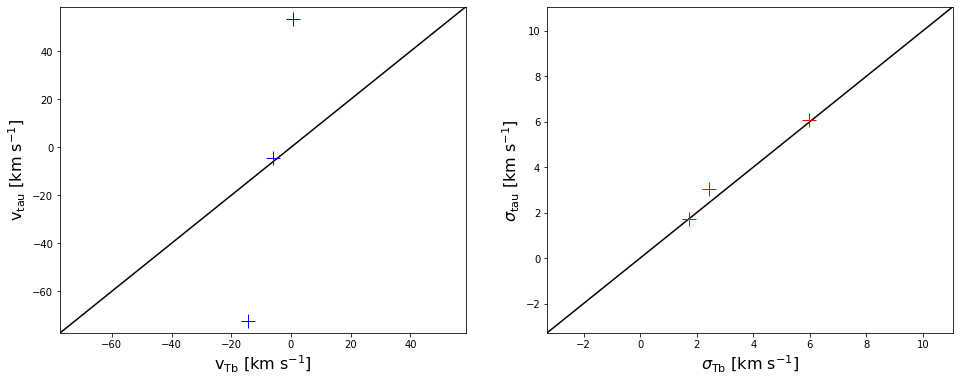

This is gaussian 4 and lambda tau 90


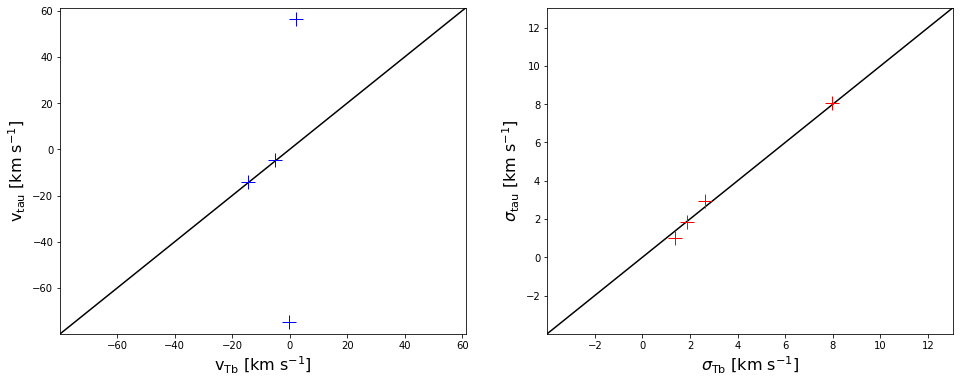

This is gaussian 5 and lambda tau 90


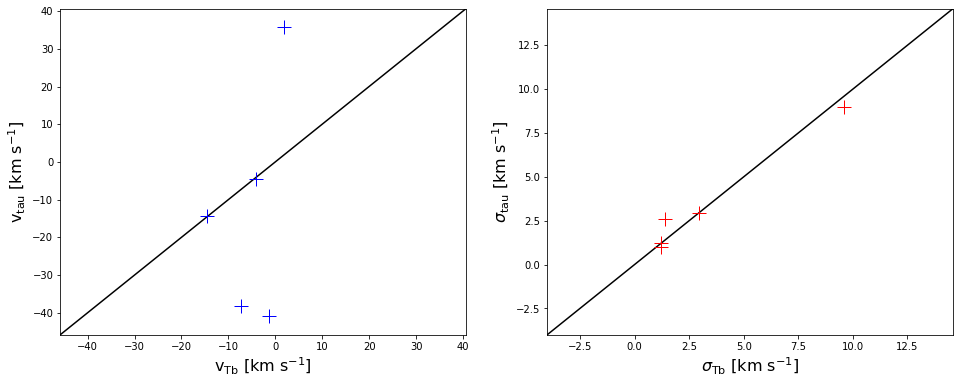

This is gaussian 6 and lambda tau 90


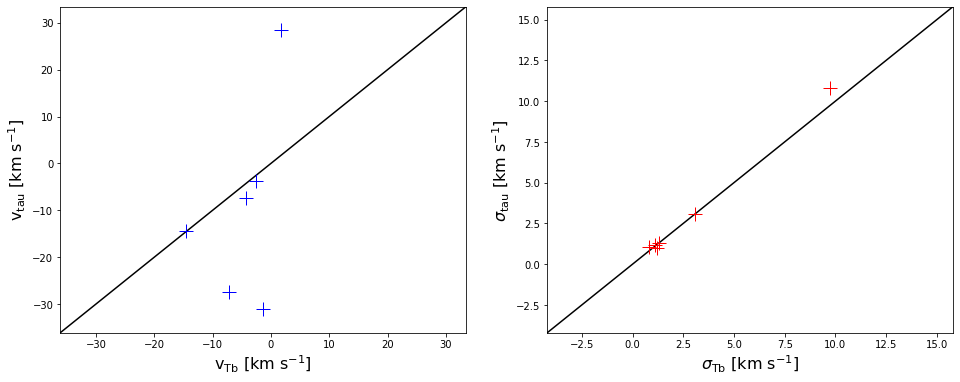

This is gaussian 7 and lambda tau 90


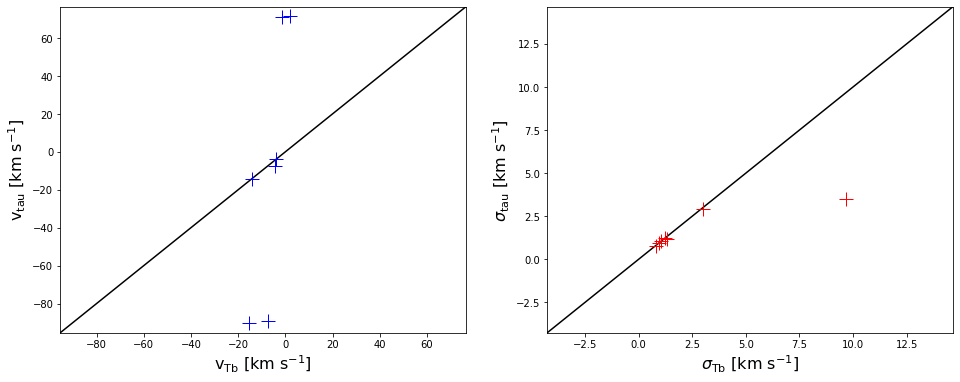

This is gaussian 8 and lambda tau 90


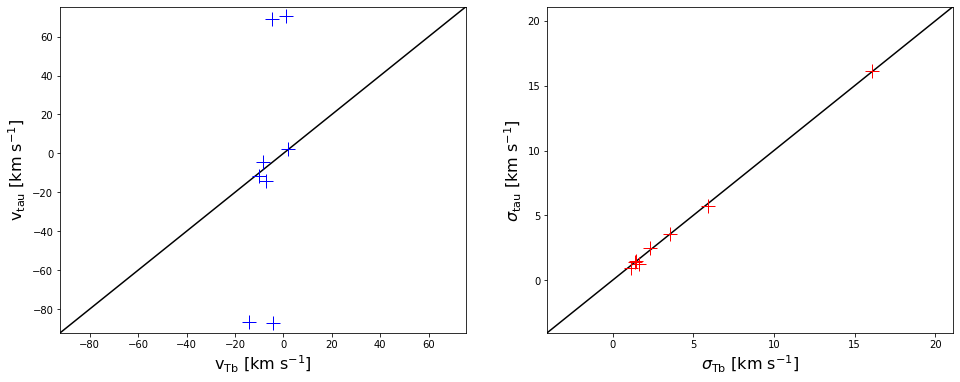

This is gaussian 9 and lambda tau 90


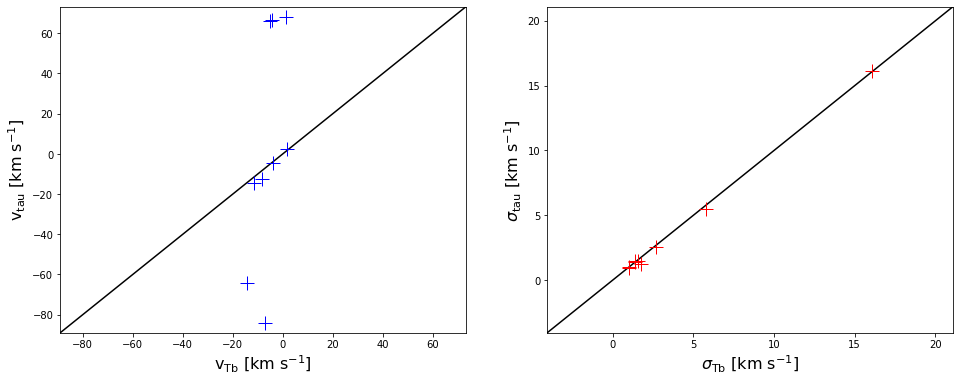

This is gaussian 1 and lambda tau 100


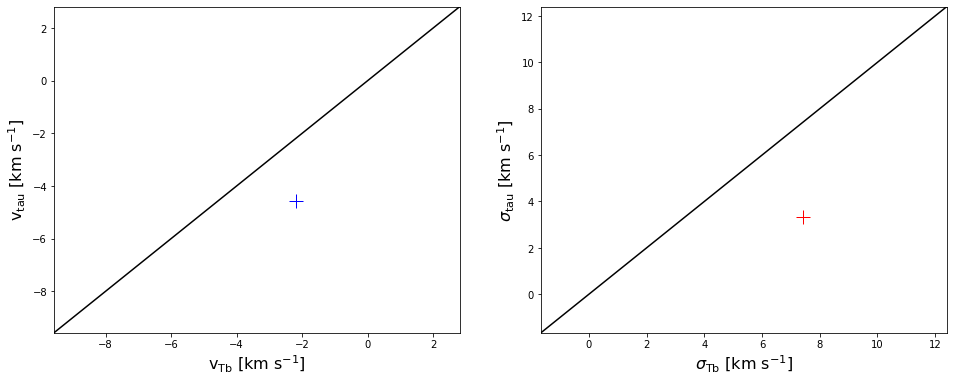

This is gaussian 2 and lambda tau 100


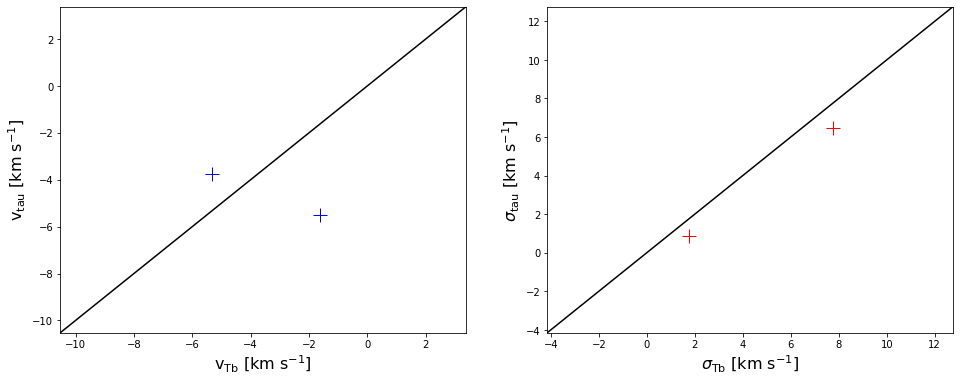

This is gaussian 3 and lambda tau 100


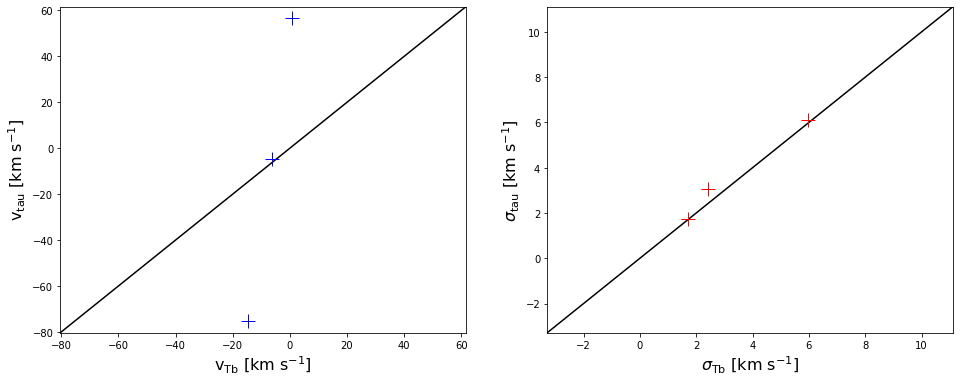

This is gaussian 4 and lambda tau 100


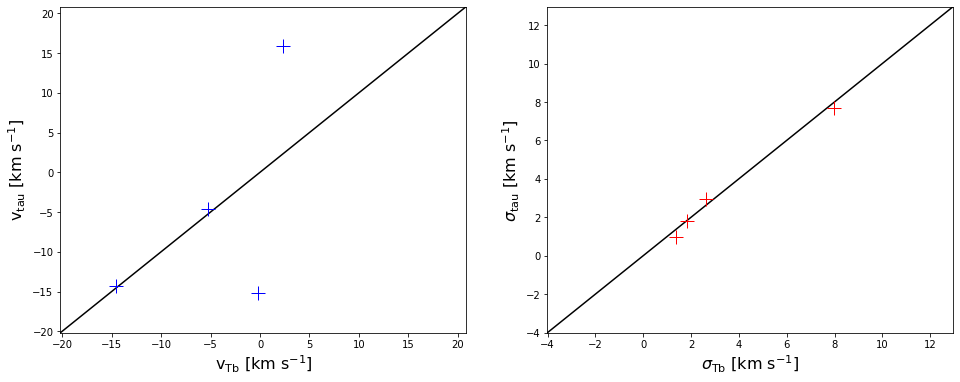

This is gaussian 5 and lambda tau 100


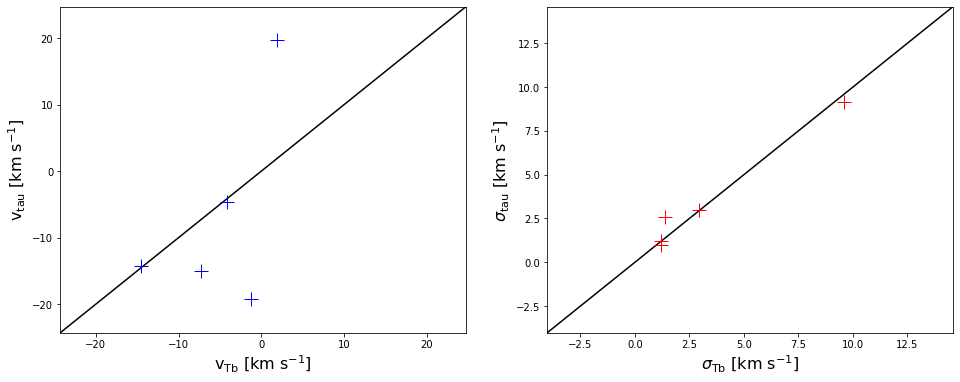

This is gaussian 6 and lambda tau 100


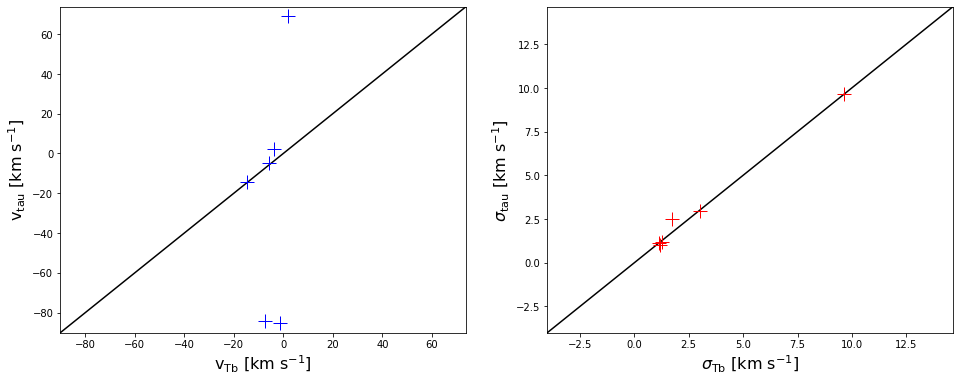

This is gaussian 7 and lambda tau 100


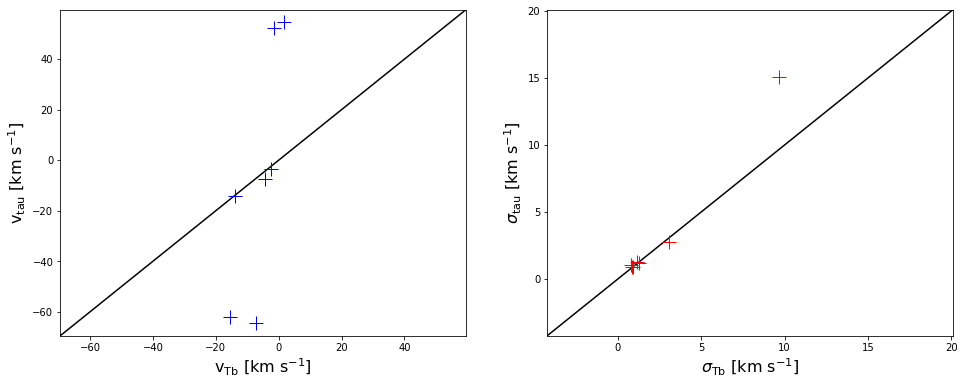

This is gaussian 8 and lambda tau 100


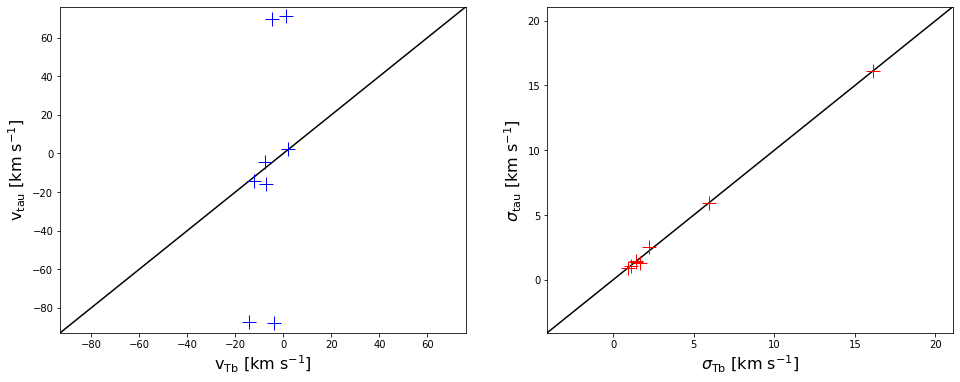

This is gaussian 9 and lambda tau 100


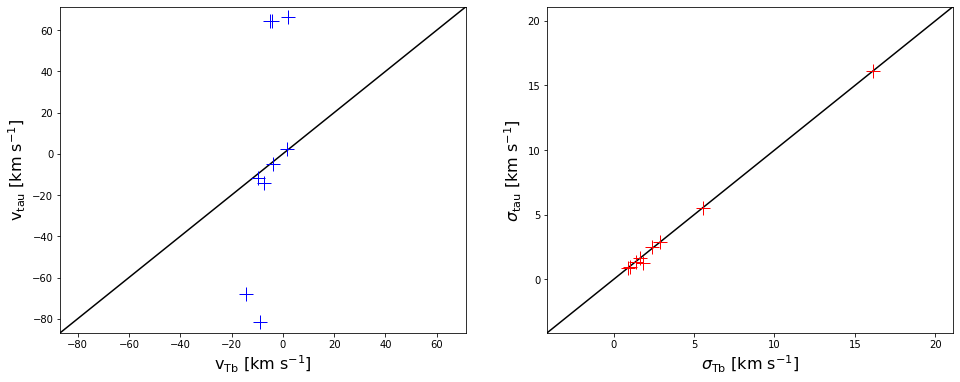

In [27]:
v_deviation_grid=np.zeros((10,9))
sig_deviation_grid=np.zeros((10,9))
x=np.arange(-100,100,0.1)
for i in np.arange(1,11):
    for j in np.arange(1,10):
        params = np.reshape(np.loadtxt("exploration_output/even_{}_{}_l{}_gaussian_params.txt".format('J2232',str(j),str(i))),
                            (3*j, cube.shape[1]))
        vfield_Tb = core.mean2vel(hdr["CRVAL3"]*1.e-3, hdr["CDELT3"], hdr["CRPIX3"], 
                            params[1::3,0])
        vfield_tau = core.mean2vel(hdr["CRVAL3"]*1.e-3, hdr["CDELT3"], hdr["CRPIX3"], 
                            params[1::3,1])
        print("This is gaussian {} and lambda tau {}".format(str(j),str(i*10)))
        plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        plt.plot(x,x, color='k')
        plt.plot(vfield_Tb, vfield_tau, "+b", markersize=14)
        plt.xlabel(r"v$_{\rm Tb}$ [km s$^{-1}$]", fontsize=16)
        plt.ylabel(r"v$_{\rm tau}$ [km s$^{-1}$]", fontsize=16)
        plt.xlim(np.min([vfield_Tb, vfield_tau])-5,np.max([vfield_Tb, vfield_tau])+5)
        plt.ylim(np.min([vfield_Tb, vfield_tau])-5,np.max([vfield_Tb, vfield_tau])+5)

        plt.subplot(1,2,2)
        plt.plot(x,x, color='k')
        plt.plot(params[:,0][2::3]*dv, params[:,1][2::3]*dv, "+r", markersize=14)
        plt.xlabel(r"$\sigma_{\rm Tb}$ [km s$^{-1}$]", fontsize=16)
        plt.ylabel(r"$\sigma_{\rm tau}$ [km s$^{-1}$]", fontsize=16)
        plt.xlim(np.min([params[:,0][2::3]*dv, params[:,1][2::3]*dv])-5,
                 np.max([params[:,0][2::3]*dv, params[:,1][2::3]*dv])+5)
        plt.ylim(np.min([params[:,0][2::3]*dv, params[:,1][2::3]*dv])-5,
                 np.max([params[:,0][2::3]*dv, params[:,1][2::3]*dv])+5)
        plt.show()
        
        v_deviation_grid[i-1,j-1]=np.sum(((np.array(vfield_Tb)-np.array(vfield_tau))/np.sqrt(2))**2)/j
        sig_deviation_grid[i-1,j-1]=np.sum(((params[:,0][2::3]*dv-params[:,1][2::3]*dv)/np.sqrt(2))**2)/j

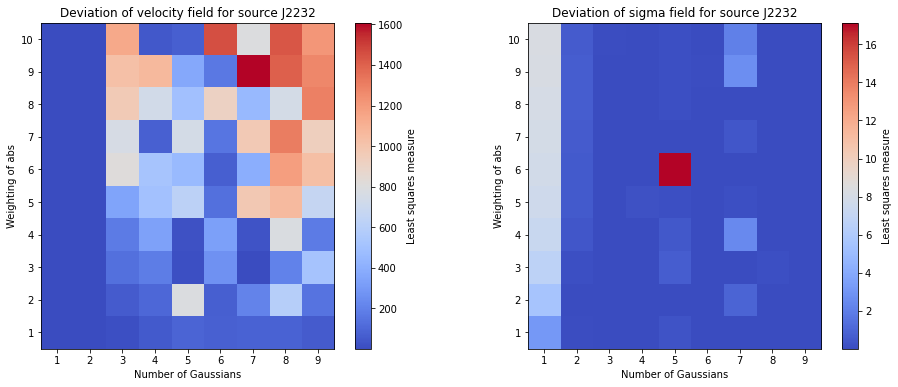

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
imgplot = plt.imshow(v_deviation_grid,origin='lower',interpolation='nearest')
imgplot.set_cmap('coolwarm')
plt.colorbar(label="Least squares measure")
#if np.max(red_chi_sq_grid)>50:
#plt.clim(0, 50)
#plt.clim(0, upper_limit[k])
plt.xlabel('Number of Gaussians')
plt.ylabel('Weighting of abs')
plt.xticks(np.arange(9),['1','2','3','4','5','6','7','8','9'])
plt.yticks(np.arange(10),['1','2','3','4','5','6','7','8','9','10'])
plt.title('Deviation of velocity field for source {}'.format('J2232'))
#plt.show()
plt.subplot(1,2,2)
imgplot = plt.imshow(sig_deviation_grid,origin='lower',interpolation='nearest')
imgplot.set_cmap('coolwarm')
plt.colorbar(label="Least squares measure")
#if np.max(red_chi_sq_grid)>50:
#plt.clim(0, 50)
#plt.clim(0, upper_limit[k])
plt.xlabel('Number of Gaussians')
plt.ylabel('Weighting of abs')
plt.xticks(np.arange(9),['1','2','3','4','5','6','7','8','9'])
plt.yticks(np.arange(10),['1','2','3','4','5','6','7','8','9','10'])
plt.title('Deviation of sigma field for source {}'.format('J2232'))
plt.show()

The plots above show the distribution of the least squares measure (the perpendicular distance of the points from the y=x line) divided by the number of points. It shows a trend of the deviation getting worse at higher lambda tau values at higher gauss

I will now do this for every source to see if it is the same trend

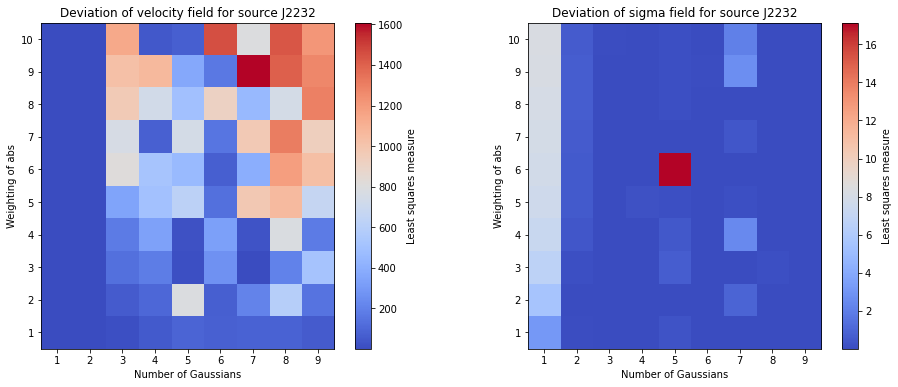

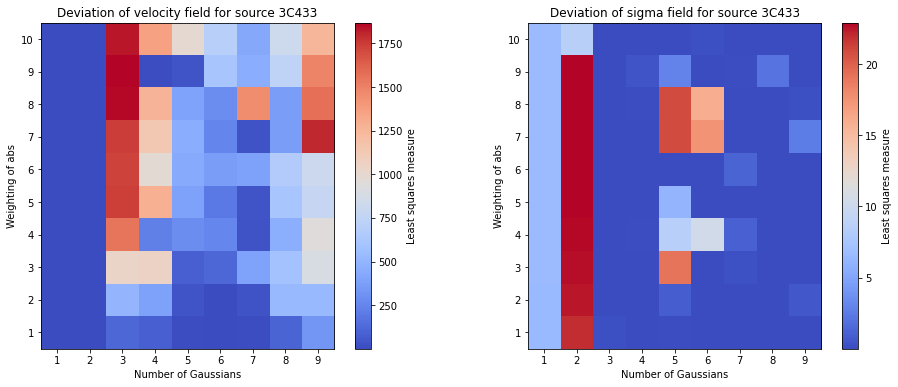

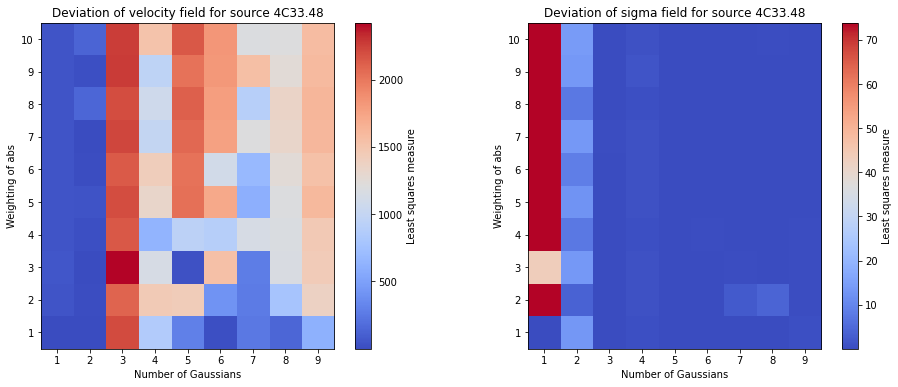

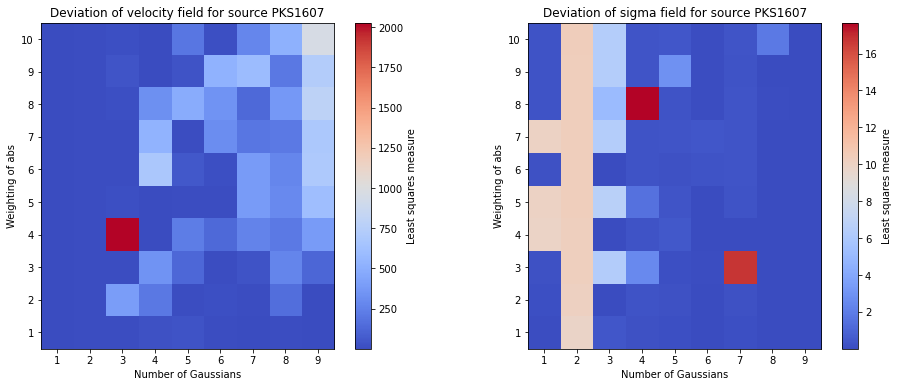

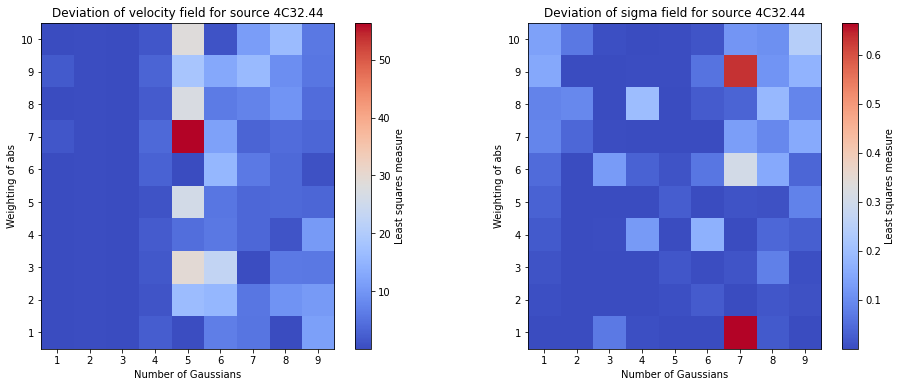

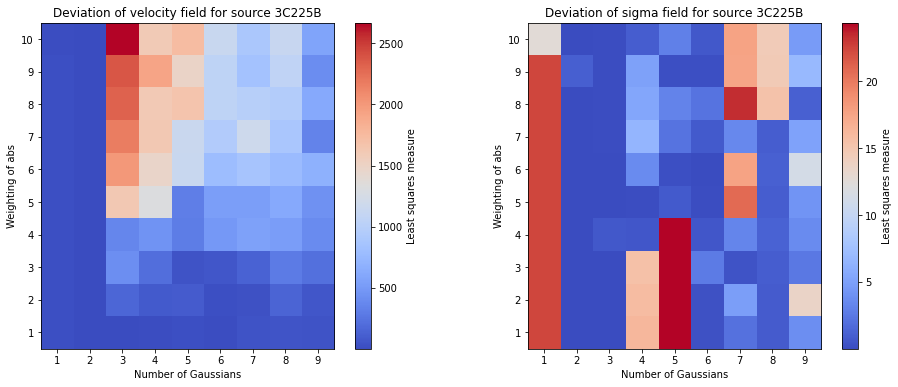

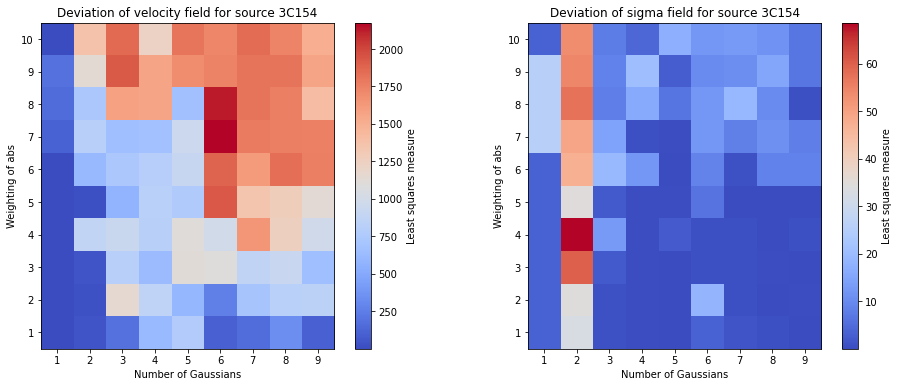

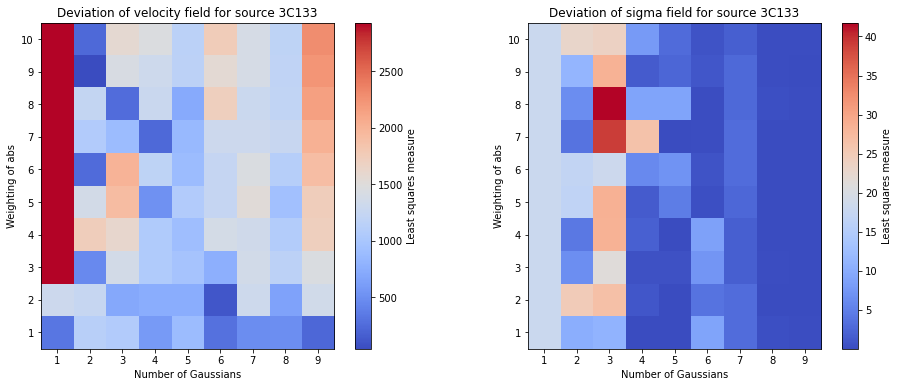

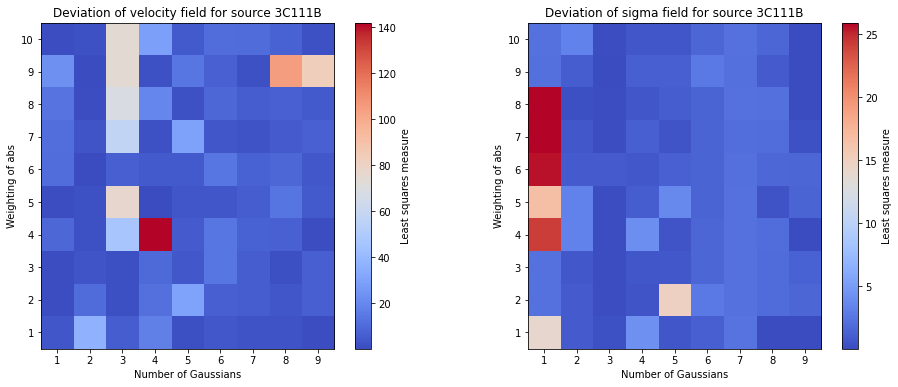

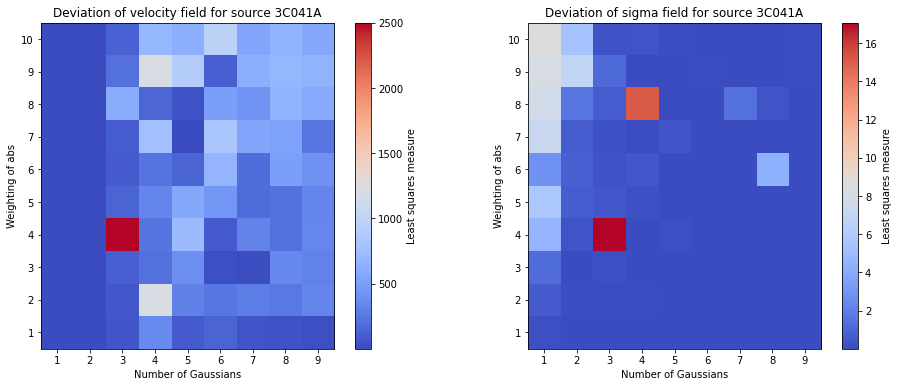

In [29]:
x=np.arange(-100,100,0.1)
for k in np.arange(10):
    v_deviation_grid=np.zeros((10,9))
    sig_deviation_grid=np.zeros((10,9))
    for i in np.arange(1,11):
        for j in np.arange(1,10):
            params = np.reshape(np.loadtxt("exploration_output/even_{}_{}_l{}_gaussian_params.txt".format(test_sources[k],str(j),str(i))),
                                (3*j, cube.shape[1]))
            vfield_Tb = core.mean2vel(hdr["CRVAL3"]*1.e-3, hdr["CDELT3"], hdr["CRPIX3"], 
                                params[1::3,0])
            vfield_tau = core.mean2vel(hdr["CRVAL3"]*1.e-3, hdr["CDELT3"], hdr["CRPIX3"], 
                                params[1::3,1])

            v_deviation_grid[i-1,j-1]=np.sum(((np.array(vfield_Tb)-np.array(vfield_tau))/np.sqrt(2))**2)/j
            sig_deviation_grid[i-1,j-1]=np.sum(((params[:,0][2::3]*dv-params[:,1][2::3]*dv)/np.sqrt(2))**2)/j
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    imgplot = plt.imshow(v_deviation_grid,origin='lower',interpolation='nearest')
    imgplot.set_cmap('coolwarm')
    plt.colorbar(label="Least squares measure")
    #if np.max(red_chi_sq_grid)>50:
    #plt.clim(0, 50)
    #plt.clim(0, upper_limit[k])
    plt.xlabel('Number of Gaussians')
    plt.ylabel('Weighting of abs')
    plt.xticks(np.arange(9),['1','2','3','4','5','6','7','8','9'])
    plt.yticks(np.arange(10),['1','2','3','4','5','6','7','8','9','10'])
    plt.title('Deviation of velocity field for source {}'.format(test_sources[k]))
    #plt.show()
    plt.subplot(1,2,2)
    imgplot = plt.imshow(sig_deviation_grid,origin='lower',interpolation='nearest')
    imgplot.set_cmap('coolwarm')
    plt.colorbar(label="Least squares measure")
    #if np.max(red_chi_sq_grid)>50:
    #plt.clim(0, 50)
    #plt.clim(0, upper_limit[k])
    plt.xlabel('Number of Gaussians')
    plt.ylabel('Weighting of abs')
    plt.xticks(np.arange(9),['1','2','3','4','5','6','7','8','9'])
    plt.yticks(np.arange(10),['1','2','3','4','5','6','7','8','9','10'])
    plt.title('Deviation of sigma field for source {}'.format(test_sources[k]))
    plt.show()